In [1]:
##############################
######第一章 线性回归#########
##############################

In [2]:
#线性回归模型
# 对于这个例子的解释http://blog.csdn.net/zhangyingchengqi/article/details/54809401
# diabetes 是一个关于糖尿病的数据集， 该数据集包括442个病人的生理数据及一年以后的病情发展情况。   
# 数据集中的特征值总共10项, 如下:  
    # 年龄  
    # 性别  
    #体质指数  
    #血压  
    #s1,s2,s3,s4,s4,s6  (六种血清的化验数据)  
    #但请注意，以上的数据是经过特殊处理， 10个数据中的每个都做了均值中心化处理，然后又用标准差乘以个体数量调整了数值范围。验证就会发现任何一列的所有数值平方和为1.   
      
#关于数据集更多的信息: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html  
   # http://scikit-learn.org/stable/datasets/index.html#datasets

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [10]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, discriminant_analysis, cross_validation

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# 这里给出加载数据集的函数
def load_data():
    diabetes =datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)
#返回值：一个元组，元组依次是：训练样本集、测试样本集、训练样本集对应的标签值、测试样本集对应的标签值

In [17]:
# 使用LinearRegression的函数如下：
def test_LinearRegression(*data):
    X_train,X_test,y_train,y_test=data
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    print('Coefficients:%s, intercept %.2f'%(regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f'% regr.score(X_test, y_test))

In [18]:
X_train, X_test, y_train, y_test=load_data()
test_LinearRegression(X_train, X_test, y_train, y_test)

Coefficients:[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354], intercept 153.07
Residual sum of squares: 3180.20
Score: 0.36


In [19]:
##########################
###线性回归模型的正则化###
##########################

In [20]:
#岭回归
def test_Ridge(*data):  # *表示输入参数表示为元组
    X_train, X_test, y_train, y_test = data
    regr = linear_model.Ridge()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept %.2f' % (regr.coef_, regr.intercept_))
    print('Residual sum of squares: %.2f' % np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [21]:
X_train, X_test, y_train, y_test = load_data()
test_Ridge(X_train, X_test, y_train, y_test)

Coefficients: [  21.19927911  -60.47711393  302.87575204  179.41206395    8.90911449
  -28.8080548  -149.30722541  112.67185758  250.53760873   99.57749017], intercept 152.45
Residual sum of squares: 3192.33
Score: 0.36


In [22]:
# 检测不同的alpha值对于预测性能的影响，给出测试函数
def test_Ridge_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas=[0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores=[]
    for i,alpha in enumerate(alphas):
        regr = linear_model.Ridge(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Ridge")
    plt.show()

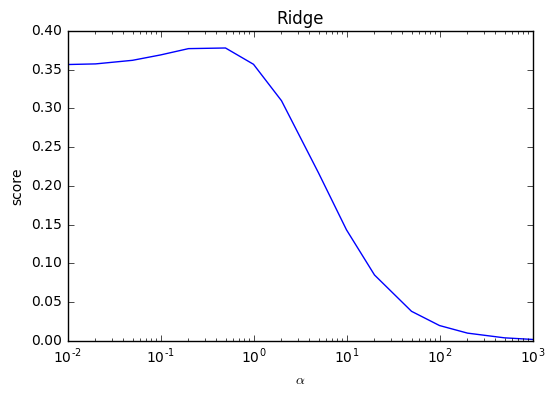

In [23]:
# 调用函数
X_train, X_test, y_train, y_test = load_data()
test_Ridge_alpha(X_train, X_test, y_train, y_test)

In [3]:
#Lasso回归
def test_Lasso(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.Lasso()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept %.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [4]:
X_train, X_test, y_train, y_test = load_data()
test_Lasso(X_train, X_test, y_train, y_test)

Coefficients: [   0.           -0.          442.67992538    0.            0.            0.
   -0.            0.          330.76014648    0.        ], intercept 152.52
Residual sum of squares: 3583.42
Score: 0.28


In [5]:
# 下面检验不同的alpha对于预测性能的影响，给出测试函数
def test_Lasso_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
    scores = []
    for i, alpha in enumerate(alphas):
        regr = linear_model.Lasso(alpha=alpha)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
#绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alphas, scores)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("Lasso")
    plt.show()

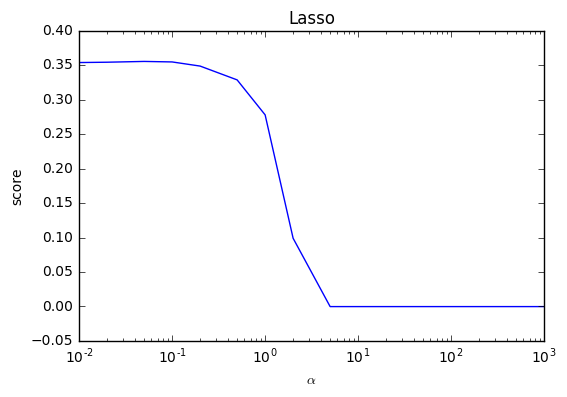

In [6]:
X_train, X_test, y_train, y_test = load_data()
test_Lasso_alpha(X_train, X_test, y_train, y_test)

In [7]:
# ElasticNet回归
# ElasticNet回归是对Lasso回归和岭回归的融合，其惩罚项是L1范数和L2范数的一个权衡

In [8]:
#使用ElasticNet的函数
def test_ElasticNet(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.ElasticNet()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept %.2f' % (regr.coef_, regr.intercept_))
    print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test)-y_test)**2))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [9]:
X_train, X_test, y_train, y_test = load_data()
test_ElasticNet(X_train, X_test, y_train, y_test)

Coefficients: [ 0.40560736  0.          3.76542456  2.38531508  0.58677945  0.22891647
 -2.15858149  2.33867566  3.49846121  1.98299707], intercept 151.93
Residual sum of squares: 4922.36
Score: 0.01


In [15]:
# 下面检验不同的alpha，rho值对于预测性能的影响，给出测试函数
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def test_ElasticNet_alpha_rho(*data):
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-2, 2)
    rhos = np.linspace(0.01, 1)
    scores=[]
    for alpha in alphas:
        for rho in rhos:
            regr = linear_model.ElasticNet(alpha=alpha, l1_ratio=rho)
            regr.fit(X_train, y_train)
            scores.append(regr.score(X_test, y_test))
# 绘图
    alphas, rhos = np.meshgrid(alphas, rhos)
    scores = np.array(scores).reshape(alphas.shape)
    fig = plt.figure()
    ax=Axes3D(fig)
    surf = ax.plot_surface(alphas, rhos, scores, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel(r"$\rho$")
    ax.set_zlabel("score")
    ax.set_title("ElasticNet")
    plt.show()

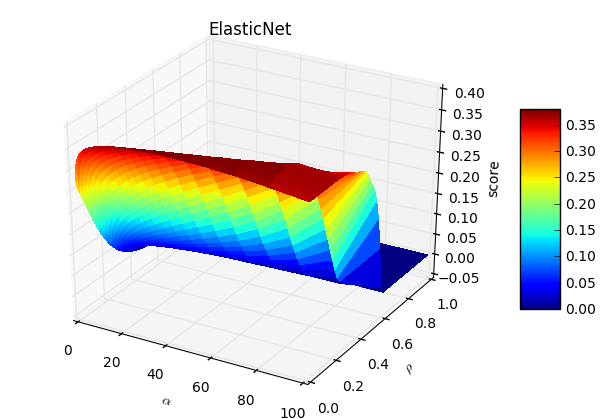

In [16]:
X_train, X_test, y_train, y_test = load_data()
test_ElasticNet_alpha_rho(X_train, X_test, y_train, y_test)

In [1]:
#逻辑回归
#对鸢尾花进行分类

In [4]:
def load_data():
    iris = datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train) # stratify分层采样

In [6]:
def test_LogisticRegression(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.LogisticRegression()
    regr.fit(X_train, y_train)
    print('Coefficient: %s, intercept %s' % (regr.coef_, regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [7]:
# 调用函数
X_train, X_test, y_train, y_test = load_data()
test_LogisticRegression(X_train, X_test, y_train, y_test)

Coefficient: [[ 0.39310895  1.35470406 -2.12308303 -0.96477916]
 [ 0.22462128 -1.34888898  0.60067997 -1.24122398]
 [-1.50918214 -1.29436177  2.14150484  2.2961458 ]], intercept [ 0.24122458  1.13775782 -1.09418724]
Score: 0.97


In [9]:
#考察multi_class参数对分类结果的影响。默认采用的是one-vs-rest策略，但是逻辑回归模型
#原生就支持多类分类，给出的测试函数
def test_LogisticRegression_multinomial(*data):
    X_train, X_test, y_train, y_test = data
    regr = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs') # 只有solver为牛顿法或者拟牛顿法才能配合multi_class='multinomial',否则报错
    regr.fit(X_train, y_train)
    print('Coefficient: %s, intercept %s' % (regr.coef_, regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [11]:
X_train, X_test, y_train, y_test = load_data()
test_LogisticRegression_multinomial(X_train, X_test, y_train, y_test)

Coefficient: [[-0.3844727   0.85502928 -2.27213058 -0.98537601]
 [ 0.34382763 -0.37438361 -0.03057819 -0.86096607]
 [ 0.04064507 -0.48064567  2.30270877  1.84634208]], intercept [  8.80428497   2.46960885 -11.27389382]
Score: 1.00


In [15]:
# 考察参数C对分类模型的预测性能的影响。C是正则化的倒数
# 它越小则正则化项的权重越大
def test_LogisticRegression_C(*data):
    X_train, X_test, y_train, y_test = data
    Cs = np.logspace(-2, 4, num=100)
    scores = []
    for C in Cs:
        regr = linear_model.LogisticRegression(C=C)
        regr.fit(X_train, y_train)
        scores.append(regr.score(X_test, y_test))
# 绘图
    fig = plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.plot(Cs, scores)
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LogisticRegression")
    plt.show()

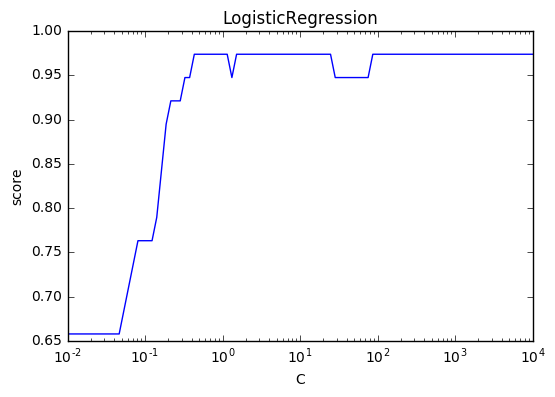

In [16]:
X_train, X_test, y_train, y_test = load_data()
test_LogisticRegression_C(X_train, X_test, y_train, y_test)

In [17]:
##################
###线性判别分析###
##################

#线性判别分析的基本思想是将高维的模式样本投影到最佳鉴别矢量空间，以达到抽取分类信息和压缩特征空间维数的效果

In [18]:
# zip函数
colors = 'rgb'
markers = 'o*s'
a=[0, 1, 2]
zip(a, colors, markers)

[(0, 'r', 'o'), (1, 'g', '*'), (2, 'b', 's')]

In [19]:
# ravel函数
#由ravel()展平的数组元素
a=np.array([[0,1,2],[3, 4, 5]])
a.ravel()

array([0, 1, 2, 3, 4, 5])

In [2]:
# numpy.vstack()函数
a = np.array([1, 2, 3])
b = np.array([2, 3, 4])
np.vstack((a, b))

array([[1, 2, 3],
       [2, 3, 4]])

In [3]:
np.hstack((a,b))

array([1, 2, 3, 2, 3, 4])

In [5]:
# 先给出使用LinearDiscriminantAnalysis
def test_LinearDiscriminantAnalysis(*data):
    X_train, X_test, y_train, y_test = data
    lda = discriminant_analysis.LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    print('Coefficients: %s, intercept %s' %(lda.coef_, lda.intercept_))
    print('Score: %.2f' % lda.score(X_test, y_test))

X_train, X_test, y_train, y_test = load_data()
test_LinearDiscriminantAnalysis(X_train, X_test, y_train, y_test)

Coefficients: [[  6.575853     9.75807593 -14.34026669 -21.39076537]
 [ -1.98385061  -3.49791089   4.21495042   2.60304299]
 [ -4.47116022  -6.09542385   9.85886057  18.29330864]], intercept [-15.33097142   0.46730077 -30.53297367]
Score: 1.00


In [24]:
# 现在来检查一下原始数据集在经过线性判别分析LDA之后的数据集的情况
# 给出绘制LDA降维之后的数据集的函数
from mpl_toolkits.mplot3d import Axes3D

def plot_LDA(converted_X, y):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = 'rgb'
    markers= 'o*s'
    for target, color, marker in zip([0, 1, 2], colors, markers):
        pos=(y==target).ravel()
        X=converted_X[pos, :]
        ax.scatter(X[:,0],X[:,1],X[:,2], color=color, marker=marker,
                  label="Label %d"%target) # X[:, 0] 第0列 X[:, 1] 第1列
    ax.legend(loc="best")
    fig.suptitle("Iris After LDA")
    plt.show()

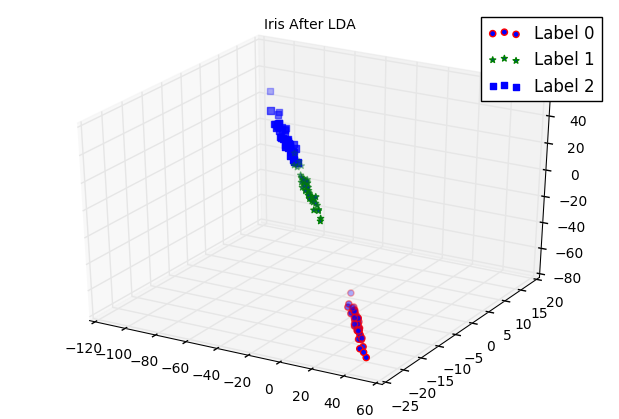

In [26]:
X_train, X_test, y_train, y_test = load_data()
X = np.vstack((X_train, X_test))
Y = np.vstack((y_train.reshape(y_train.size, 1), y_test.reshape(y_test.size, 1)))
lda = discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X, Y)
converted_X = np.dot(X, np.transpose(lda.coef_))+lda.intercept_  # 第一项中的每一列加上lda.intercept
plot_LDA(converted_X, Y)

In [51]:
X = np.vstack((X_train, X_test))
np.dot(X, np.transpose(lda.coef_))[0]

array([-24.34495629,   3.14161981,  21.20333648])

In [49]:
lda.intercept_

array([-15.39551377,  -2.11157446, -33.63654989])

In [53]:
np.dot(X, np.transpose(lda.coef_))+lda.intercept_

array([[ -3.97404701e+01,   1.03004536e+00,  -1.24332134e+01],
       [  2.41494145e+01,  -1.54999629e+01,  -5.97930897e+01],
       [  1.98016955e+01,  -1.43048370e+01,  -5.66404967e+01],
       [ -3.26991509e+01,  -1.21029473e+00,  -1.72341925e+01],
       [ -6.58755355e+01,   5.87806377e+00,   8.85383362e+00],
       [ -6.97769964e+01,   6.71692178e+00,   1.19164365e+01],
       [ -4.94414174e+01,   2.88876613e+00,  -4.59098689e+00],
       [  3.04671100e+01,  -1.79819300e+01,  -6.36288181e+01],
       [ -4.75051138e+01,   2.08444868e+00,  -5.72297301e+00],
       [  1.90747097e+01,  -1.56310605e+01,  -5.45872873e+01],
       [  4.53846036e+01,  -2.21628463e+01,  -7.43653955e+01],
       [ -3.87183835e+01,   1.14656811e-01,  -1.25399114e+01],
       [  3.09217224e+01,  -1.77021301e+01,  -6.43632304e+01],
       [ -8.14786324e+01,   8.22306664e+00,   2.21119276e+01],
       [  2.20775456e+01,  -1.58315501e+01,  -5.73896337e+01],
       [ -3.29961569e+01,  -2.39017630e+00,  -1.5757305

In [45]:
np.array([[1,1,1],[1, 2, 3]])

array([[1, 1, 1],
       [1, 2, 3]])

In [46]:
np.array([1, 2, 3])

array([1, 2, 3])

In [47]:
np.array([[1,1,1],[1, 2, 3]])+np.array([1, 2, 3])

array([[2, 3, 4],
       [2, 4, 6]])

In [54]:
# 接下来考察不同的solver对预测性能的影响
def test_LinearDiscriminantAnalysis_solver(*data):
    X_train, X_test, y_train, y_test = data
    solvers = ['svd', 'lsqr', 'eigen']
    for solver in solvers:
        if(solver=='svd'):
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver)
        else:
            lda = discriminant_analysis.LinearDiscriminantAnalysis(solver=solver, shrinkage=None)
        lda.fit(X_train, y_train)
        print('Score at solver= %s: %.2f' %(solver, lda.score(X_test, y_test)))
    
# 调用该函数
X_train, X_test, y_train, y_test = load_data()
test_LinearDiscriminantAnalysis_solver(X_train, X_test, y_train, y_test)

Score at solver= svd: 1.00
Score at solver= lsqr: 1.00
Score at solver= eigen: 1.00


In [55]:
# 最后考察在solver=lsqr中引入抖动。引入抖动相当于引入正则化项
def test_LinearDiscriminantAnalysis_shrinkage(*data):
    X_train, X_test, y_train, y_test = data
    shrinkages = np.linspace(0.0, 1.0, num=20)
    scores = []
    for shrinkage in shrinkages:
        lda = discriminant_analysis.LinearDiscriminantAnalysis(solver='lsqr', shrinkage=shrinkage)
        lda.fit(X_train, y_train)
        scores.append(lda.score(X_test, y_test))
# 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(shrinkages, scores)
    ax.set_xlabel(r"shrinkage")
    ax.set_ylabel(r"score")
    ax.set_ylim(0, 1.05)
    ax.set_title("LinearDiscriminantAnalysis")
    plt.show()

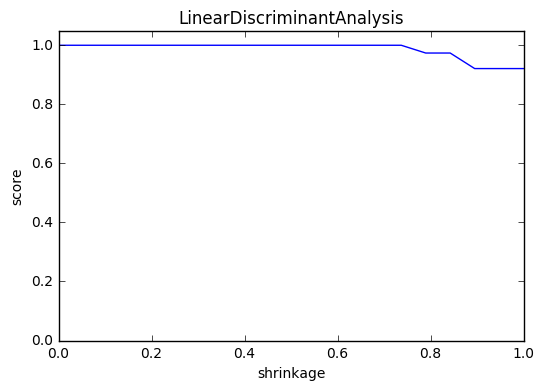

In [56]:
X_train, X_test, y_train, y_test = load_data()
test_LinearDiscriminantAnalysis_shrinkage(X_train, X_test, y_train, y_test)

In [2]:
############################
######第二章 决策树#########
############################

In [5]:
###回归决策树##
# 导入包
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import cross_validation
import matplotlib.pyplot as plt

In [11]:
X = np.random.rand(5,1) # 生成5行一列 每个均在0-1之间的随机数
X

array([[ 0.96320438],
       [ 0.65615141],
       [ 0.2700393 ],
       [ 0.68944191],
       [ 0.5492127 ]])

In [9]:
y = np.sin(X).ravel()
y

array([ 0.36031901, -0.93040174,  0.78639388, -0.99710313, -0.99819309])

In [10]:
y[::2] # 从第一个开始 每两个挑一个数

array([ 0.36031901,  0.78639388, -0.99819309])

In [12]:
# 给出一个随机产生的数据集
def creat_data(n):
    np.random.seed(0)
    X = 5*np.random.rand(n,1)
    y = np.sin(X).ravel()
    noise_num = int(n/5)
    y[::5] += 3*(0.5 - np.random.rand(noise_num))
    return cross_validation.train_test_split(X, y, test_size=0.25, random_state=1)

In [21]:
# 然后给出测试函数
def test_DecisionTreeRegressor(*data):
    X_train, X_test, y_train, y_test = data
    regr = DecisionTreeRegressor()
    regr.fit(X_train, y_train)
    print("Training score: %f" % (regr.score(X_train, y_train)))
    print("Testing score: %f" % (regr.score(X_test, y_test)))
    #绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    X = np.arange(0.0, 5, 0.01)[:, np.newaxis] # n行 1列
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label="train sample", c='g')
    ax.scatter(X_test, y_test, label="test sample", c='r')
    ax.plot(X, Y, label="predict_value", linewidth=2, alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regrssion")
    ax.legend(framealpha=0.5)
    plt.show()

Training score: 1.000000
Testing score: 0.789107


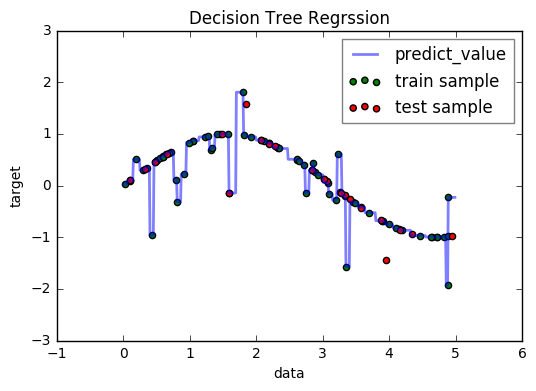

In [22]:
X_train, X_test, y_train, y_test = creat_data(100)
test_DecisionTreeRegressor(X_train, X_test, y_train, y_test)

In [30]:
# 接下来，检验随机划分与最优划分的影响，给出函数
def test_DecisionTreeRegressor_splitter(*data):
    X_train, X_test, y_train, y_test = data
    splitters=['best', 'random']
    for splitter in splitters:
        regr = DecisionTreeRegressor(splitter=splitter)
        regr.fit(X_train, y_train)
        print("Spliteer %s" % splitter)
        print("Training score: %f" % (regr.score(X_train, y_train)))
        print("Testing score:%f" % (regr.score(X_test, y_test)))

X_train, X_test, y_train, y_test = creat_data(100)
test_DecisionTreeRegressor_splitter(X_train, X_test, y_train, y_test)

Spliteer best
Training score: 1.000000
Testing score:0.789107
Spliteer random
Training score: 1.000000
Testing score:0.778989


In [39]:
# 最后考察决策树深度的影响。决策树的深度对应着数的复杂度。决策树越深
# 模型越复杂

def test_DecisionTreeRegressor_depth(*data):
    X_train, X_test, y_train, y_test = data
    depths = np.arange(1, 20)
    training_scores = []
    testing_scores = []
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train, y_train))
        testing_scores.append(regr.score(X_test, y_test))
        
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(depths, training_scores, label="training score")
    ax.plot(depths, testing_scores, label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()


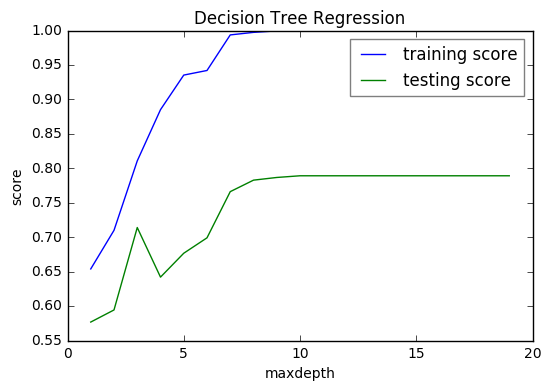

In [40]:
X_train, X_test, y_train, y_test = creat_data(100)
test_DecisionTreeRegressor_depth(X_train, X_test, y_train, y_test)

In [41]:
###分类决策树##
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import cross_validation

In [42]:
def load_data():
    iris = datasets.load_iris()
    X_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train)

In [43]:
# 给出了使用DecisionTreeClassifier进行分类的函数
def test_DecisionTreeClassifier(*data):
    X_train, X_test, y_train, y_test = data
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    print("Training score: %f" % (clf.score(X_train, y_train)))
    print("Testing score: %f" % (clf.score(X_test, y_test)))

#调用test_DecisionTreeClassifier
X_train, X_test, y_train, y_test = load_data()
test_DecisionTreeClassifier(X_train, X_test, y_train, y_test)

Training score: 1.000000
Testing score: 0.973684


In [45]:
# criterion对于分类性能的影响
def test_DecisionTreeClassifier_criterion(*data):
    X_train, X_test, y_train, y_test = data
    criterions=['gini', 'entropy']
    for criterion in criterions:
        clf = DecisionTreeClassifier(criterion=criterion)
        clf.fit(X_train, y_train)
        print("criterion: %s" %criterion)
        print("Training score: %f" %(clf.score(X_train, y_train)))
        print("Testing score: %f" %(clf.score(X_test, y_test)))

X_train, X_test, y_train, y_test = load_data()
test_DecisionTreeClassifier_criterion(X_train, X_test, y_train, y_test)

criterion: gini
Training score: 1.000000
Testing score: 0.947368
criterion: entropy
Training score: 1.000000
Testing score: 0.947368


In [46]:
# 决策图
from sklearn.tree import export_graphviz

In [47]:
X_train, X_test, y_train, y_test = load_data()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
export_graphviz(clf, "out")

In [1]:
################################
######第三章 贝叶斯分类器#######
################################
# http://blog.csdn.net/lsldd/article/details/41542107

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


('vector from images 0:', array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]))


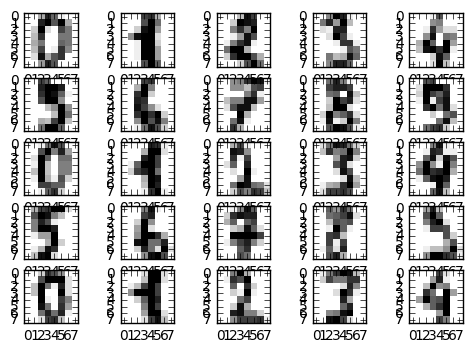

In [1]:
# 首先导入包
from sklearn import datasets, cross_validation, naive_bayes
import numpy as np
import matplotlib.pyplot as plt

def show_digits():
    digits = datasets.load_digits()
    fig = plt.figure()
    print("vector from images 0:" ,digits.data[0])
    for i in range(25):
        ax=fig.add_subplot(5,5,i+1)
        ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_digits()

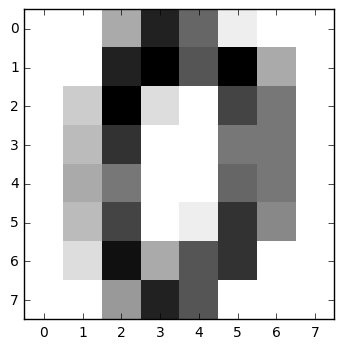

('vector from images:', array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]))


In [7]:
from sklearn import datasets, cross_validation, naive_bayes
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()
fig = plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.imshow(digits.images[0], cmap=plt.cm.gray_r,interpolation='nearest')
plt.show()
print("vector from images:" ,digits.data[0])

In [8]:
digits = datasets.load_digits()
digits.target[1]

1

In [9]:
digits = datasets.load_digits()
digits.data[1]

array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
        11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
         0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
         0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
        16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
         0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.])

In [3]:
def load_data():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [4]:
# 高斯贝叶斯分类器（GaussianNB）
def test_GaussianNB(*data):
    X_train, X_test, y_train, y_test = data
    cls = naive_bayes.GaussianNB()
    cls.fit(X_train, y_train)
    print('Training Score: %.2f' % cls.score(X_train, y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_GaussianNB(X_train, X_test, y_train, y_test)

Training Score: 0.86
Testing Score: 0.83


In [6]:
# 多项式贝叶斯分类器

def test_MultinomialNB(*data):
    X_train, X_test, y_train, y_test = data
    cls=naive_bayes.MultinomialNB()
    cls.fit(X_train, y_train)
    print('Training Score: %.2f' % cls.score(X_train, y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))

X_train, X_test, y_train, y_test = load_data()
test_MultinomialNB(X_train, X_test, y_train, y_test)

Training Score: 0.91
Testing Score: 0.91


In [13]:
# 检测不同的alpha对多项式贝叶斯分类器的预测性能的影响
def test_MultinomialNB_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-2, 5, num=200)
    train_scores = []
    test_scores = []
    for alpha in alphas:
        cls = naive_bayes.MultinomialNB(alpha=alpha)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    
##绘图
    fig = plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.plot(alphas, train_scores, label="Training Score")
    ax.plot(alphas, test_scores, label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_title("MultinomialNB")
    ax.set_xscale("log")
    plt.show()

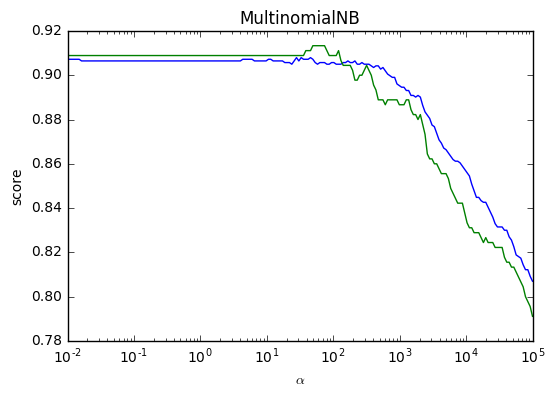

In [14]:
X_train, X_test, y_train, y_test = load_data()
test_MultinomialNB_alpha(X_train, X_test, y_train, y_test)

In [1]:
# 伯努利贝叶斯分类器（BernoulliNB）

In [1]:
from sklearn import datasets, cross_validation, naive_bayes
import numpy as np
import matplotlib.pyplot as plt

def load_data():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def test_BernoulliNB(*data):
    X_train, X_test, y_train, y_test = data
    cls = naive_bayes.BernoulliNB()
    cls.fit(X_train, y_train)
    print('Training Score: %.2f' % cls.score(X_train, y_train))
    print('Testing Score: %.2f' % cls.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = load_data()
test_BernoulliNB(X_train, X_test, y_train, y_test)

Training Score: 0.87
Testing Score: 0.85


In [7]:
def test_BernoulliNB_alpha(*data):
    X_train, X_test, y_train, y_test = data
    alphas = np.logspace(-2, 5, num=200)
    train_scores=[]
    test_scores=[]
    for alpha in alphas:
        cls = naive_bayes.BernoulliNB(alpha=alpha)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    # 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(alphas, train_scores, label="Training Score")
    ax.plot(alphas, test_scores, label="Testing Score")
    ax.set_xlabel(r"$\alpha$")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.0)
    ax.set_title("BernoulliNB")
    ax.set_xscale("log")
    ax.legend(loc="best")
    plt.show()

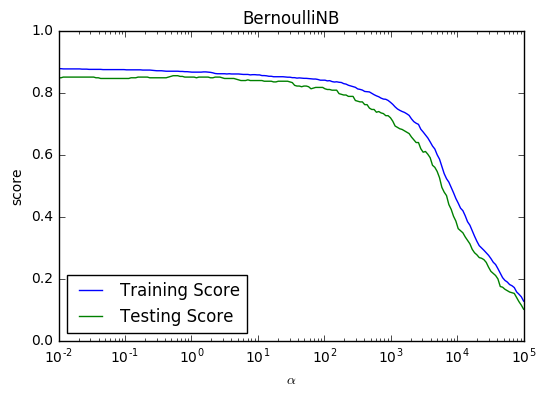

In [8]:
X_train, X_test, y_train, y_test = load_data()
test_BernoulliNB_alpha(X_train, X_test, y_train, y_test)

In [12]:
min(np.min(X_train.ravel()),np.min(X_test.ravel()))

0.0

In [13]:
# 考察binarize的参数对伯努利贝叶斯分类器的预测性能的影响。
def test_BernoulliNB_binarize(*data):
    X_train, X_test, y_train, y_test = data
    min_x = min(np.min(X_train.ravel()), np.min(X_test.ravel()))-0.1
    max_x = max(np.max(X_train.ravel()), np.min(X_test.ravel()))+0.1
    binarizes=np.linspace(min_x, max_x, endpoint=True, num=100)
    train_scores = []
    test_scores = []
    for binarize in binarizes:
        cls = naive_bayes.BernoulliNB(binarize=binarize)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.plot(binarizes, train_scores, label="Training Score")
    ax.plot(binarizes, test_scores, label="Testing Score")
    ax.set_xlabel("binarize")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.0)
    ax.set_xlim(min_x-1, max_x+1)
    ax.set_title("BernoulliNB")
    ax.legend(loc="best")
    plt.show()

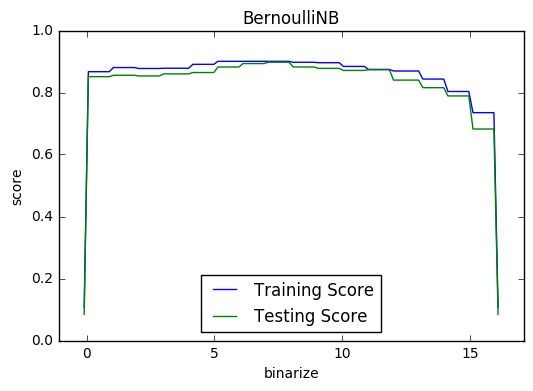

In [14]:
X_train, X_test, y_train, y_test = load_data()
test_BernoulliNB_binarize(X_train, X_test, y_train, y_test)

In [1]:
###############
####k近邻法####
###############

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets, cross_validation

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_classification_data():
    digits = datasets.load_digits()
    X_train = digits.data
    y_train = digits.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25, random_state=0, stratify=y_train)

In [3]:
def create_regression_data(n):
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    y[::5] += 1 * (0.5 - np.random.rand(int(n/5)))
    return cross_validation.train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
def test_KNeighborsClassifier(*data):
    X_train, X_test, y_train, y_test = data
    clf=neighbors.KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print("Training Score: %f" %clf.score(X_train, y_train))
    print("Testing Score: %f" %clf.score(X_test, y_test))

X_train, X_test, y_train, y_test = load_classification_data()
test_KNeighborsClassifier(X_train, X_test, y_train, y_test)

Training Score: 0.991091
Testing Score: 0.980000


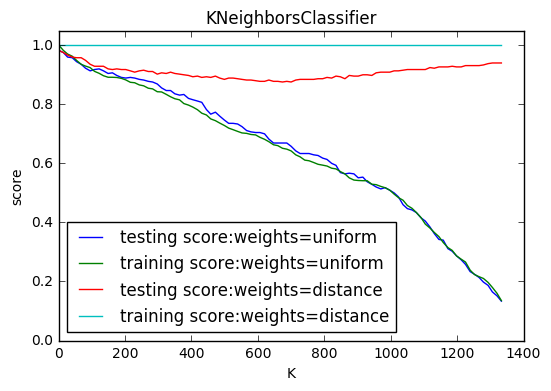

In [5]:
#考察k值以及投票策略对于预测性能的影响，给出测试函数
def test_KNeighborsClassifier_k_w(*data):
    X_train, X_test, y_train, y_test = data
    Ks = np.linspace(1, y_train.size, num=100, endpoint=False, dtype='int')
    weights=['uniform', 'distance']
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for weight in weights:
        training_scores = []
        testing_scores = []
        for K in Ks:
            clf = neighbors.KNeighborsClassifier(weights=weight, n_neighbors=K)
            clf.fit(X_train, y_train)
            testing_scores.append(clf.score(X_test, y_test))
            training_scores.append(clf.score(X_train, y_train))
        ax.plot(Ks, testing_scores, label="testing score:weights=%s"%weight)
        ax.plot(Ks, training_scores, label="training score:weights=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()
    
X_train, X_test, y_train, y_test = load_classification_data()
test_KNeighborsClassifier_k_w(X_train, X_test, y_train, y_test)

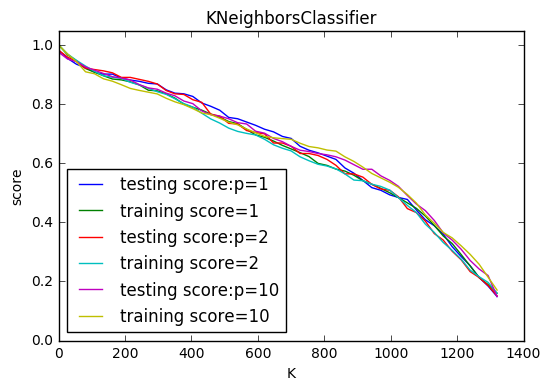

In [7]:
#考察p值（即距离函数的形式）对于预测性能的影响，给出测试函数
def test_KNeighborsClassifier_k_p(*data):
    X_train, X_test, y_train, y_test = data
    Ks = np.linspace(1, y_train.size, endpoint=False, dtype='int')
    Ps = [1, 2, 10]
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            clf=neighbors.KNeighborsClassifier(p=P, n_neighbors=K)
            clf.fit(X_train, y_train)
            testing_scores.append(clf.score(X_test, y_test))
            training_scores.append(clf.score(X_train, y_train))
        ax.plot(Ks, testing_scores, label="testing score:p=%d" %P)
        ax.plot(Ks, training_scores, label="training score=%d" %P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.set_title("KNeighborsClassifier")
    plt.show()
    
X_train, X_test, y_train, y_test = load_classification_data()
test_KNeighborsClassifier_k_p(X_train, X_test, y_train, y_test)

In [5]:
# kNN回归KNeighborsRegressor
def test_KNeighborsRegressor(*data):
    X_train, X_test, y_train, y_test = data
    regr = neighbors.KNeighborsRegressor()
    regr.fit(X_train, y_train)
    print("Training Score: %f" %regr.score(X_train, y_train))
    print("Testing Score: %f" %regr.score(X_test, y_test))
    
X_train, X_test, y_train, y_test = create_regression_data(1000)
test_KNeighborsRegressor(X_train, X_test, y_train, y_test)

Training Score: 0.974991
Testing Score: 0.962245


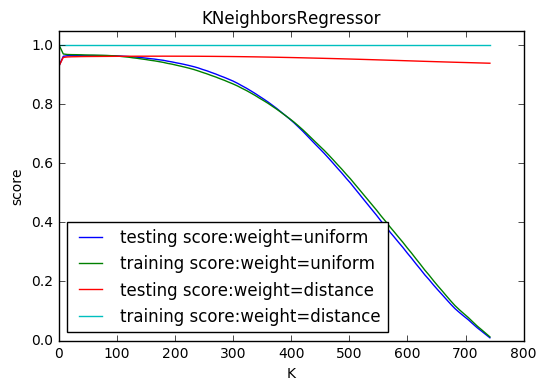

In [7]:
#考察k值以及投票策略对预测性能的影响
def test_KNeighborsRegressor_k_w(*data):
    X_train, X_test, y_train, y_test=data
    Ks=np.linspace(1, y_train.size, num=100, endpoint=False, dtype='int')
    weights = ['uniform', 'distance']
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for weight in weights:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr = neighbors.KNeighborsRegressor(weights=weight, n_neighbors=K)
            regr.fit(X_train, y_train)
            testing_scores.append(regr.score(X_test, y_test))
            training_scores.append(regr.score(X_train, y_train))
        ax.plot(Ks, testing_scores, label="testing score:weight=%s"%weight)
        ax.plot(Ks, training_scores, label="training score:weight=%s"%weight)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

X_train, X_test, y_train, y_test = create_regression_data(1000)
test_KNeighborsRegressor_k_w(X_train, X_test, y_train, y_test)

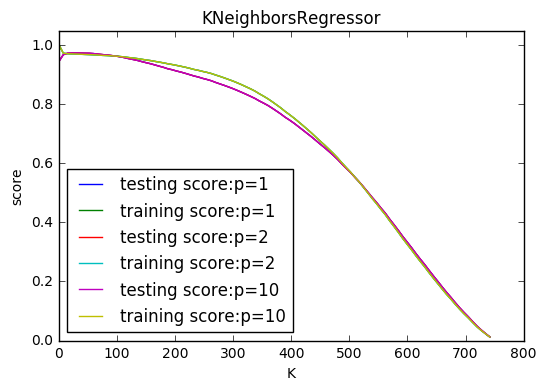

In [10]:
# 考察p值（即距离函数的形式）对于预测性能的影响，给出测试函数
def test_KNeighborsRegressor_k_p(*data):
    X_train, X_test, y_train, y_test=data
    Ks=np.linspace(1, y_train.size, num=100, endpoint=False, dtype='int')
    Ps = [1, 2, 10]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for P in Ps:
        training_scores=[]
        testing_scores=[]
        for K in Ks:
            regr = neighbors.KNeighborsRegressor(p=P, n_neighbors=K)
            regr.fit(X_train, y_train)
            testing_scores.append(regr.score(X_test, y_test))
            training_scores.append(regr.score(X_train, y_train))
        ax.plot(Ks, testing_scores, label="testing score:p=%s"%P)
        ax.plot(Ks, training_scores, label="training score:p=%s"%P)
    ax.legend(loc='best')
    ax.set_xlabel("K")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.set_title("KNeighborsRegressor")
    plt.show()

X_train, X_test, y_train, y_test = create_regression_data(1000)
test_KNeighborsRegressor_k_p(X_train, X_test, y_train, y_test)

In [11]:
################
####数据降维####
################

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,decomposition, manifold

In [2]:
def load_data():
    iris=datasets.load_iris()
    return iris.data, iris.target

In [3]:
###########
####PCA####
###########

In [2]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1,-2,-2], [-2,-1,-3], [-3,-3,-1],
              [1, 3, 2], [2, 1, 3], [3, 2, 1]])
pca = PCA(n_components=2) #we reduce it into 2
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.transform(X))


[ 0.86535978  0.08824017]
[ 12.11503698   1.23536244]
[[ 2.87480213 -0.3313395 ]
 [ 3.44556073 -1.38433246]
 [ 4.0700882   1.54167497]
 [-3.45529375 -0.18065724]
 [-3.44556073  1.38433246]
 [-3.48959658 -1.02967824]]


In [8]:
def test_PCA(*data):
    X, y=data
    pca=decomposition.PCA(n_components=None)
    pca.fit(X)
    print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))
    
X,y=load_data()
test_PCA(X, y)

explained variance ratio: [ 0.92461621  0.05301557  0.01718514  0.00518309]


In [10]:
y=np.unique(y)
y

array([0, 1, 2])

In [11]:
colors=((1,0,0),(0,1,0))

In [12]:
for label, color in zip(np.unique(y), colors):
    print label, color

0 (1, 0, 0)
1 (0, 1, 0)


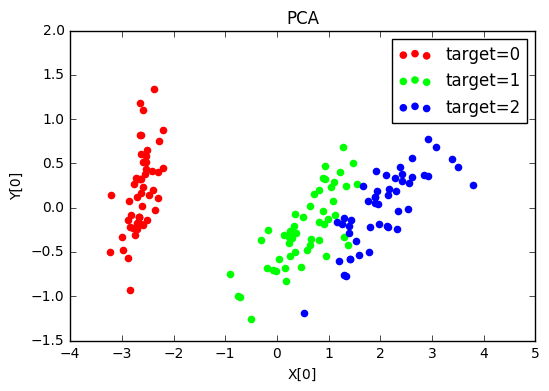

In [13]:
def plot_PCA(*data):
    X,y = data
    pca=decomposition.PCA(n_components=2)
    pca.fit(X)
    X_r=pca.transform(X)
    X_r
    
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
#   colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5, 0.3, 0.2))
    colors=((1,0,0),(0,1,0),(0,0,1)) # 三原色
    for label, color in zip(np.unique(y), colors):
        position=y==label
        ax.scatter(X_r[position, 0],X_r[position, 1], label="target=%d" %label, color=color)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()
    
X,y=load_data()
plot_PCA(X, y)

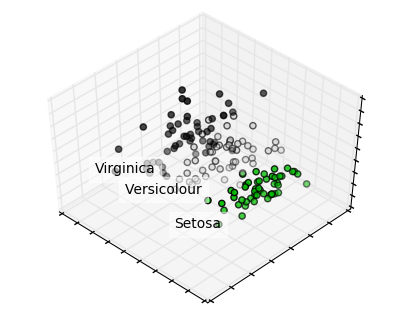

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3)) #prepare to plot pictures
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [4]:
#################
####KernelPCA####
#################

In [8]:
#KPCA是一个升维的过程
def test_KPCA(*data):
    X,y=data
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    for kernel in kernels:
        kpca=decomposition.KernelPCA(n_components=None, kernel=kernel)
        kpca.fit(X)
        print('kernel=%s --> lambdas: %s' % (kernel, kpca.lambdas_))
        
X,y=load_data()
test_KPCA(X,y)

kernel=linear --> lambdas: [  6.29501274e+02   3.60942922e+01   1.17000623e+01   3.52877104e+00
   1.23394056e-12   5.54310305e-13   2.91757922e-13   1.33515733e-13
   4.84115317e-14   3.26647657e-14   3.02707873e-14   2.82114385e-14
   2.55138855e-14   2.47236628e-14   2.42500372e-14   2.41876064e-14
   2.29574047e-14   2.11651224e-14   2.10207413e-14   2.07342150e-14
   1.64943440e-14   1.62275228e-14   1.53967614e-14   1.38718997e-14
   1.24731379e-14   1.21425968e-14   1.20887382e-14   1.13413977e-14
   1.11020031e-14   1.08430746e-14   1.02100875e-14   1.02015759e-14
   9.28949935e-15   9.00205130e-15   8.86900147e-15   8.86424681e-15
   8.05569904e-15   7.36898299e-15   7.01105709e-15   6.96142115e-15
   6.88310218e-15   6.51041138e-15   6.01544171e-15   5.99296660e-15
   5.79334213e-15   5.53479463e-15   5.24936499e-15   5.16119869e-15
   5.14658424e-15   4.76711540e-15   4.53656550e-15   4.22019864e-15
   4.19690102e-15   4.01214024e-15   3.70125920e-15   3.24536874e-15
   2.90

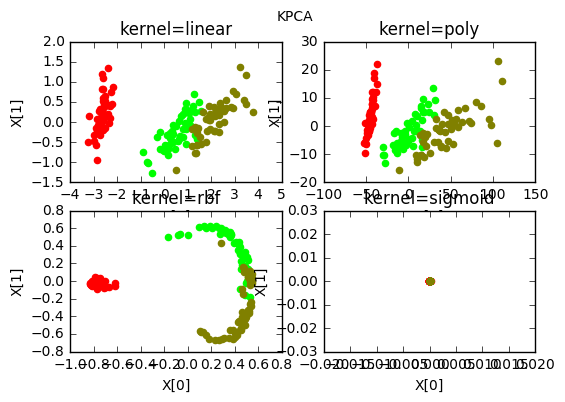

In [20]:
def plot_KPCA(*data):
    X,y=data
    kernels=['linear','poly','rbf','sigmoid']
    fig=plt.figure()
    colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
    
    for i,kernel in enumerate(kernels):
        kpca=decomposition.KernelPCA(n_components=2, kernel=kernel)
        kpca.fit(X)
        X_r=kpca.transform(X) # X_r是一个n*2的array
        ax=fig.add_subplot(2,2,i+1)
        for label,color in zip(np.unique(y), colors):
            position=y==label
            ax.scatter(X_r[position, 0], X_r[position, 1], label="target=%d" % label, color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
#        ax.legend(loc="best")
        ax.set_title("kernel=%s"%kernel)
    plt.suptitle("KPCA")
    plt.show()

X,y=load_data()
plot_KPCA(X,y)

In [3]:
#考察高斯核的参数的影响

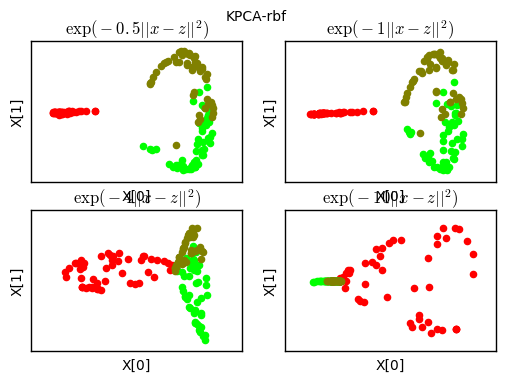

In [9]:
def plot_KPCA_rbf(*data):
    X,y=data
    fig=plt.figure()
    colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
    Gammas=[0.5, 1, 4, 10]
    for i,gamma in enumerate(Gammas):
        kpca=decomposition.KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
        kpca.fit(X)
        X_r=kpca.transform(X)
        ax=fig.add_subplot(2,2,i+1)
        for label, color in zip(np.unique(y), colors):
            position=y==label
            ax.scatter(X_r[position, 0], X_r[position, 1], label="target=%d"%label, color=color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel("X[1]")
    # ax.legend(loc="best")
        ax.set_title(r"$\exp(-%s||x-z||^2)$"%gamma)
    plt.suptitle("KPCA-rbf")
    plt.show()
    
X,y=load_data()
plot_KPCA_rbf(X,y)

In [10]:
#考察sigmoid核的参数的影响

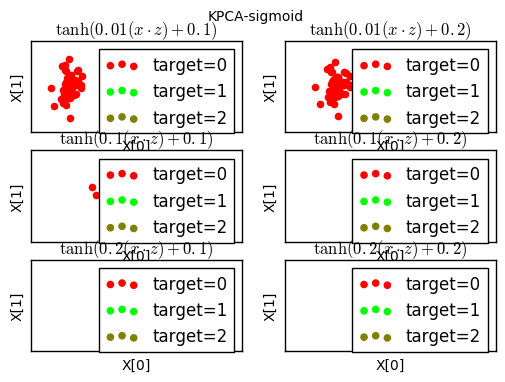

In [11]:
def plot_KPCA_sigmod(*data):
    X,y=data
    fig=plt.figure()
    colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
    Params=[(0.01,0.1),(0.01,0.2),(0.1,0.1),(0.1,0.2),(0.2,0.1),(0.2,0.2)]
    for i,(gamma,r) in enumerate(Params):
        kpca=decomposition.KernelPCA(n_components=2, kernel='sigmoid', gamma=gamma, coef0=r)
        kpca.fit(X)
        X_r=kpca.transform(X)
        ax=fig.add_subplot(3,2,i+1)
        for label, color in zip(np.unique(y), colors):
            position=y==label
            ax.scatter(X_r[position, 0], X_r[position, 1], label="target=%d" % label, color=color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$\tanh(%s(x\cdot z)+%s)$"%(gamma, r))
    plt.suptitle("KPCA-sigmoid")
    plt.show()
    
X,y=load_data()
plot_KPCA_sigmod(X,y)

In [12]:
# MDS降维

In [14]:
# 首先使用MDS类，给出测试函数
# stress_不能用于判定降维效果的好坏，它只是一个中性指标
def test_MDS(*data):
    X,y=data
    for n in [4, 3, 2, 1]:
        mds=manifold.MDS(n_components=n)
        mds.fit(X)
        print('stress(n_components=%d) : %s' % (n, str(mds.stress_)))
        
X,y=load_data()
test_MDS(X,y)

stress(n_components=4) : 12.3199032626
stress(n_components=3) : 18.1539710703
stress(n_components=2) : 117.460085686
stress(n_components=1) : 987.521990884


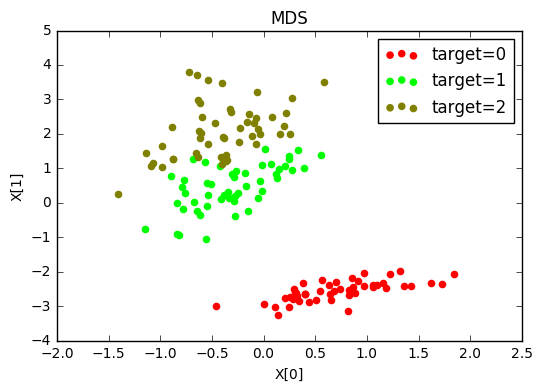

In [15]:
#给出绘制降维后的样本的分部图的函数
def plot_MDS(*data):
    X,y=data
    mds=manifold.MDS(n_components=2)
    X_r=mds.fit_transform(X)
    
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
    for label, color in zip(np.unique(y), colors):
        position=y==label
        ax.scatter(X_r[position,0], X_r[position, 1], label="target=%d" % label,  color=color)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("X[1]")
    ax.legend(loc="best")
    ax.set_title("MDS")
    plt.show()
    
X,y=load_data()
plot_MDS(X,y)

In [16]:
#等度量映射（Isomap）降维
def test_Isomap(*data):
    X,y=data
    for n in [4,3,2,1]:
        isomap=manifold.Isomap(n_components=n)
        isomap.fit(X)
        print('reconstruction_error(n_components=%d):%s' % (n, isomap.reconstruction_error()))

X,y=load_data()
test_Isomap(X,y)

reconstruction_error(n_components=4):1.00971800681
reconstruction_error(n_components=3):1.01828451463
reconstruction_error(n_components=2):1.02769837643
reconstruction_error(n_components=1):1.07166427632


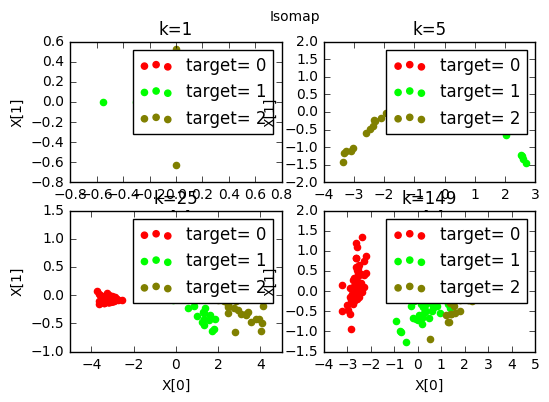

In [17]:
def plot_Isomap_k(*data):
    X,y=data
    Ks=[1,5,25,y.size-1]
    fig=plt.figure()
    for i,k in enumerate(Ks):
        isomap=manifold.Isomap(n_components=2, n_neighbors=k)
        X_r=isomap.fit_transform(X)
        ax=fig.add_subplot(2,2,i+1)
        colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
        for label, color in zip(np.unique(y), colors):
            position=y==label
            ax.scatter(X_r[position, 0], X_r[position, 1], label="target= %d" %label, color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("Isomap")
    plt.show()
    
X,y=load_data()
plot_Isomap_k(X,y)
        

In [3]:
#LLE模型

In [4]:
#首先使用LocallyLinearEmbedding类，给出测试函数
def test_LocallyLinearEmbedding(*data):
    X,y=data
    for n in [4, 3, 2, 1]:
        lle=manifold.LocallyLinearEmbedding(n_components=n)
        lle.fit(X)
        print('reconstruction_error(n_components=%d): %s' % (n, lle.reconstruction_error_))

X,y=load_data()
test_LocallyLinearEmbedding(X,y)

reconstruction_error(n_components=4): 7.19936880315e-07
reconstruction_error(n_components=3): 3.8706050124e-07
reconstruction_error(n_components=2): 6.64141979745e-08
reconstruction_error(n_components=1): -1.68696037388e-15


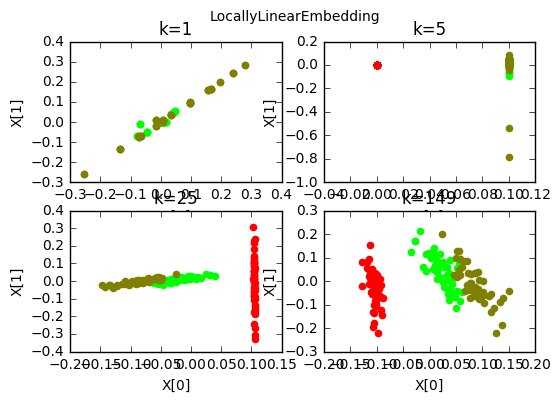

In [6]:
#给出绘制降维后的样本的分布图的函数：
def plot_LocallyLinearEmbedding_k(*data):
    X,y=data
    Ks=[1, 5, 25, y.size-1]
    fig=plt.figure()
    for i,k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=2, n_neighbors=k)
        X_r=lle.fit_transform(X)
        
        ax=fig.add_subplot(2,2,i+1)
        colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
        for label, color in zip(np.unique(y), colors):
            position=y==label
            ax.scatter(X_r[position, 0], X_r[position, 1], label="target=%d" % label, color=color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        #ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()

X,y=load_data()
plot_LocallyLinearEmbedding_k(X,y)

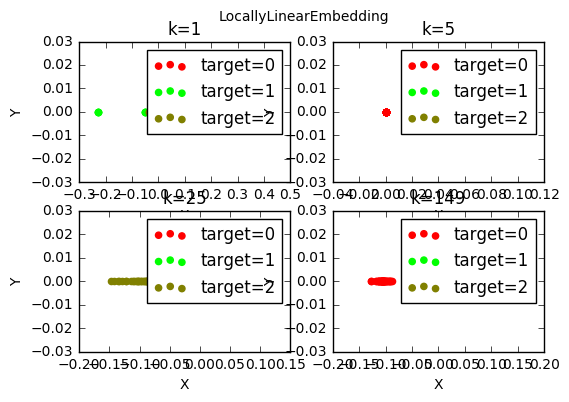

In [11]:
# 最后给出将原始数据的特征直接压缩到一维时的情形
def plot_LocallyLinearEmbedding_k_d1(*data):
    X,y=data
    Ks=[1, 5, 25, y.size-1]
    
    fig=plt.figure()
    for i,k in enumerate(Ks):
        lle=manifold.LocallyLinearEmbedding(n_components=1, n_neighbors=k)
        X_r=lle.fit_transform(X)
        
        ax=fig.add_subplot(2,2,i+1)
        colors=((1,0,0),(0,1,0),(0.5, 0.5, 0),(0, 0.5, 0.5),(0.5,0,0.5),(0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2))
        for label, color in zip(np.unique(y), colors):
            position=y==label
            ax.scatter(X_r[position], np.zeros_like(X_r[position]),label="target=%d" %label, color=color)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend(loc="best")
        ax.set_title("k=%d"%k)
    plt.suptitle("LocallyLinearEmbedding")
    plt.show()
        
X,y=load_data()
plot_LocallyLinearEmbedding_k_d1(X,y)

In [12]:
####################
####聚类和EM算法####
####################

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn import cluster
from sklearn.metrics import adjusted_rand_score
from sklearn import mixture

In [2]:
#然后给出生产数据的函数
def create_data(centers, num=100, std=0.7):
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return X, labels_true

In [3]:
#make_blobs的参数解释
#centers：聚类中心点组成的数组
#n_samples：样本数
#cluster_std:每个簇中的标准差

In [4]:
#观察一下生成的样本点
def plot_data(*data):
    X, labels_true=data
    labels=np.unique(labels_true)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgby'
    for i,label in enumerate(labels):
        position=labels_true==label
        ax.scatter(X[position,0], X[position, 1], label="cluster %d" %label, color=colors[i%len(colors)])
    ax.legend(loc="best", framealpha=0.5)
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[1]")
    ax.set_title("data")
    plt.show()

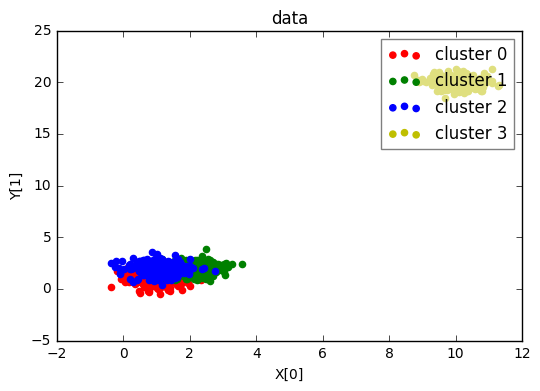

In [5]:
#调用该函数观察1000个点的分布
X, labels_true=create_data([[1,1],[2,2],[1,2],[10, 20]],1000,0.5)
plot_data(X, labels_true)

In [6]:
###############
###K均值聚类###
###############

In [7]:
def test_Kmeans(*data):
    X,labels_true=data
    clst=cluster.KMeans()
    clst.fit(X)
    predicted_labels=clst.predict(X)
    print("ARI:%s" % adjusted_rand_score(labels_true, predicted_labels))
    print("Sum center distance %s" % clst.inertia_)

In [9]:
#然后调用test_Kmeans
centers=[[1,1],[2,2],[1,2],[10,20]]
X, labels_true=create_data(centers, 1000, 0.5)
test_Kmeans(X, labels_true)

ARI:0.36233283152
Sum center distance 240.946650612


In [8]:
#考察簇的数量的影响
def test_Kmeans_nclusters(*data):
    X, labels_true=data
    nums=range(1,50)
    AIRs=[]
    Distances=[]
    for num in nums:
        clst=cluster.KMeans(n_clusters=num)
        clst.fit(X)
        predicted_labels=clst.predict(X)
        AIRs.append(adjusted_rand_score(labels_true, predicted_labels))
        Distances.append(clst.inertia_)
# 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(nums, AIRs, marker="+")
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums, Distances, marker='o')
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("KMeans")
    fig.suptitle("KMeans")
    plt.show()

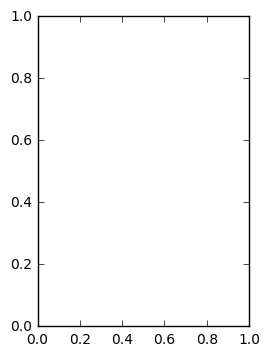

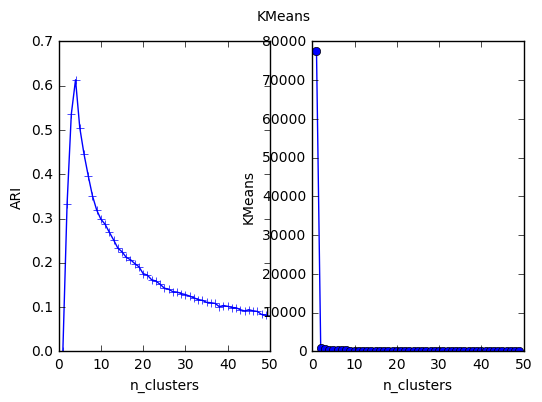

In [9]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X, labels_true=create_data(centers, 1000, 0.5)
test_Kmeans_nclusters(X, labels_true)

In [4]:
#n_init 一个整数，指定k均值算法运行的次数。每一次都会选择一组不同的初始值向量，
#最终算法会选择最佳的分类簇来作为最终的结果。

In [11]:
def test_Kmeans_n_init(*data):
    X,labels_true=data
    nums=range(1,50)
    fig=plt.figure()
    ARIs_k=[]
    Distances_k=[]
    ARIs_r=[]
    Distances_r=[]
    for num in nums:
        clst=cluster.KMeans(n_init=num, init='k-means++')
        clst.fit(X)
        predicted_labels=clst.predict(X)
        ARIs_k.append(adjusted_rand_score(labels_true, predicted_labels))
        Distances_k.append(clst.inertia_)
        
        clst=cluster.KMeans(n_init=num, init='random')
        clst.fit(X)
        predicted_labels=clst.predict(X)
        ARIs_r.append(adjusted_rand_score(labels_true, predicted_labels))
        Distances_r.append(clst.inertia_)
    
    ax=fig.add_subplot(1,2,1)
    ax.plot(nums, ARIs_k, marker="+", label="k-means++")
    ax.plot(nums, ARIs_r, marker="+", label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("ARI")
    ax.set_ylim(0,1)
    ax.legend(loc='best')
    ax=fig.add_subplot(1,2,2)
    ax.plot(nums, Distances_k, marker="o", label="k-means++")
    ax.plot(nums, Distances_r, marker="o", label="random")
    ax.set_xlabel("n_init")
    ax.set_ylabel("inertia_")
    ax.legend(loc='best')
    
    fig.suptitle("KMeans")
    plt.show()
    


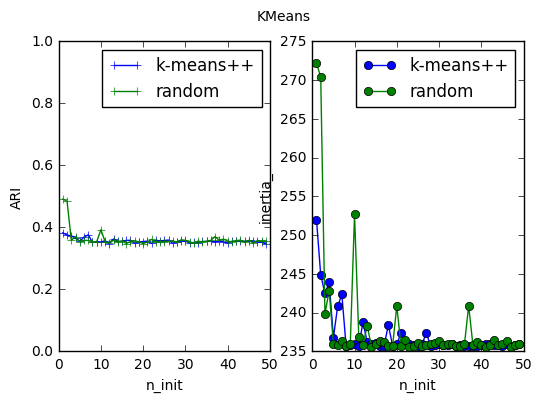

In [12]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X, labels_true=create_data(centers, 1000, 0.5)
test_Kmeans_n_init(X, labels_true)

In [3]:
#混合高斯（GaussianMixture）

In [3]:
def test_GMM(*data):
    X,labels_true=data
    clst=mixture.GaussianMixture()
    clst.fit(X)
    predicted_labels=clst.predict(X)
    print("ARI:%s" % adjusted_rand_score(labels_true, predicted_labels))

In [4]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_GMM(X, labels_true)

ARI:0.0


In [7]:
def test_GMM_n_components(*data):
    X, labels_true=data
    nums=range(1,50)
    ARIs=[]
    for num in nums:
        clst=mixture.GaussianMixture(n_components=num)
        clst.fit(X)
        predicted_labels=clst.predict(X)
        ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
    
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(nums, ARIs, marker="+")
    ax.set_xlabel("n_components")
    ax.set_ylabel("ARI")
    fig.suptitle("GMM")
    plt.show()

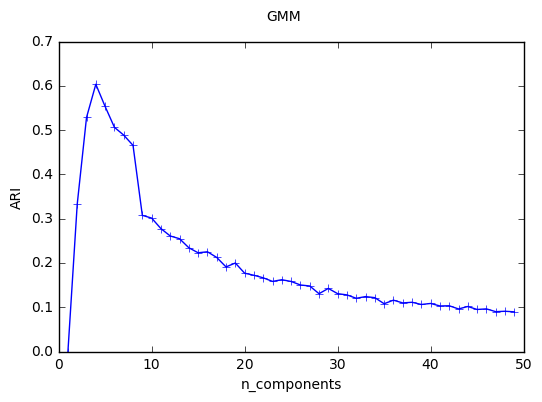

In [8]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_GMM_n_components(X, labels_true)
#可以看到n_components=4时，ARI指数最大

In [9]:
#考察协方差类型的影响，给出测试函数
def test_GMM_cov_type(*data):
    X,labels_true=data
    nums=range(1,50)
    cov_types=['spherical','tied','diag','full']
    markers="+o*s"
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    
    for i, cov_type in enumerate(cov_types):
        ARIs=[]
        for num in nums:
            clst=mixture.GaussianMixture(n_components=num, covariance_type=cov_type)
            clst.fit(X)
            predicted_labels=clst.predict(X)
            ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        ax.plot(nums, ARIs, marker=markers[i], label="covariance_type:%s"%cov_type)
        
    ax.set_xlabel("n_components")
    ax.legend(loc="best")
    ax.set_ylabel("ARIs")
    fig.suptitle("GMM")
    plt.show()

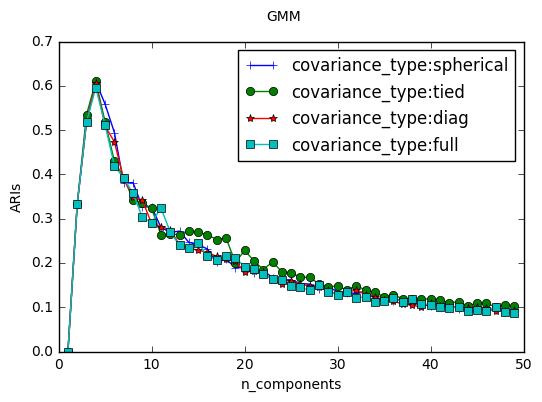

In [10]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_GMM_cov_type(X, labels_true)

In [11]:
#密度聚类（DBSCAN）

In [14]:
def test_DBSCAN(*data):
    X,labels_true=data
    clst=cluster.DBSCAN()
    #clst.fit(X)
    predicted_labels=clst.fit_predict(X)
    print("ARI:%s" % adjusted_rand_score(labels_true, predicted_labels))
    print("Core sample num:%d" %len(clst.core_sample_indices_))

In [15]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_DBSCAN(X, labels_true)

ARI:0.330300409773
Core sample num:989


In [16]:
#考察epsilon的影响
def test_DBSCAN_epsilon(*data):
    X, labels_true=data
    epsilons=np.logspace(-1, 1.5)
    ARIs=[]
    Core_nums=[]
    for epsilon in epsilons:
        clst=cluster.DBSCAN(eps=epsilon)
        predicted_labels=clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(epsilons, ARIs, marker='+')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')
    
    ax=fig.add_subplot(1,2,2)
    ax.plot(epsilons, Core_nums, marker='o')
    ax.set_xscale('log')
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r'Core_Nums')
    
    fig.suptitle("DBSCAN")
    plt.show()

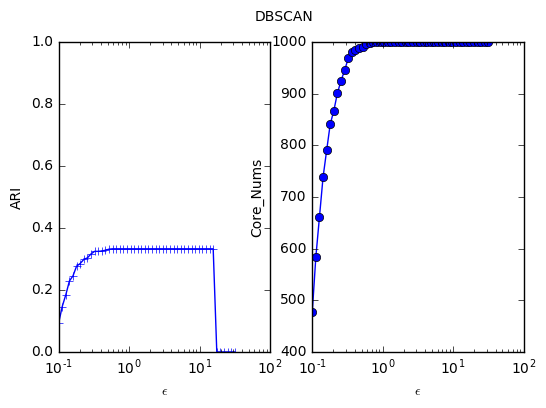

In [17]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_DBSCAN_epsilon(X, labels_true)

In [18]:
#考察MinPts参数的影响
def test_DBSCAN_min_samples(*data):
    X,labels_true=data
    min_samples=range(1,100)
    ARIs=[]
    Core_nums=[]
    for num in min_samples:
        clst=cluster.DBSCAN(min_samples=num)
        predicted_labels=clst.fit_predict(X)
        ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        Core_nums.append(len(clst.core_sample_indices_))
    #绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,2,1)
    ax.plot(min_samples, ARIs, marker='+')
    ax.set_xlabel("min_samples")
    ax.set_ylim(0,1)
    ax.set_ylabel('ARI')
    
    ax=fig.add_subplot(1,2,2)
    ax.plot(min_samples, Core_nums, marker='o')
    ax.set_xlabel("min_samples")
    ax.set_ylabel('Core_Nums')
    
    fig.suptitle("DBSCAN")
    plt.show()

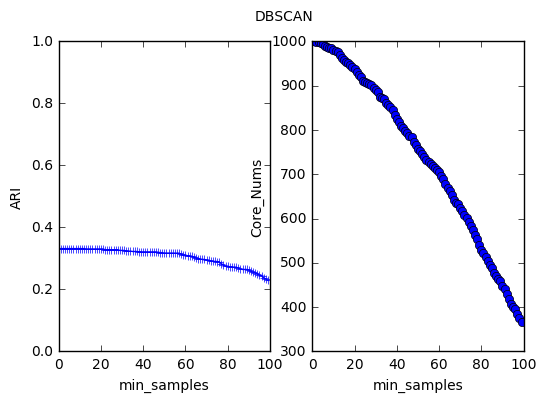

In [19]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X,labels_true=create_data(centers, 1000, 0.5)
test_DBSCAN_min_samples(X, labels_true)

In [20]:
#层次聚类（Agglomerative Clustering）

In [21]:
def test_AgglomerativeClustering(*data):
    X,labels_true=data
    clst=cluster.AgglomerativeClustering()
    predicted_labels=clst.fit_predict(X)
    print("ARI:%s" % adjusted_rand_score(labels_true, predicted_labels))

In [22]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X, labels_true=create_data(centers, 1000, 0.5)
test_AgglomerativeClustering(X, labels_true)

ARI:0.332665330661


In [23]:
#接下来考察簇的数量对于聚类效果的影响，首先给出测试函数
def test_AgglomerativeClustering_linkage(*data):
    X, labels_true=data
    nums=range(1,50)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    
    linkages=['ward','complete','average']
    markers="+o*"
    for i, linkage in enumerate(linkages):
        ARIs=[]
        for num in nums:
            clst=cluster.AgglomerativeClustering(n_clusters=num, linkage=linkage)
            predicted_labels=clst.fit_predict(X)
            ARIs.append(adjusted_rand_score(labels_true, predicted_labels))
        ax.plot(nums, ARIs, marker=markers[i], label="linkage:%s"%linkage)
    
    ax.set_xlabel("n_clusters")
    ax.set_ylabel("ARI")
    ax.legend(loc="best")
    fig.suptitle("AgglomerativeClustering")
    plt.show()

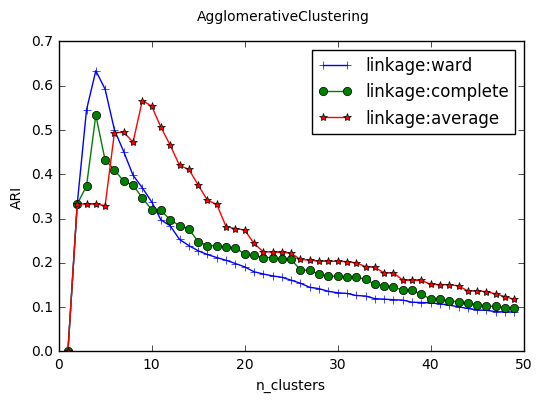

In [24]:
centers=[[1,1],[2,2],[1,2],[10,20]]
X, labels_true=create_data(centers, 1000, 0.5)
test_AgglomerativeClustering_linkage(X, labels_true)

In [1]:
###################
###支持向量机SVM###
###################

In [2]:
#线性分类SVM

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation, svm

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#在支持向量回归问题中，使用的数据集是scikit-learn自带的一个糖尿病病人的数据集。
#该数据集从糖尿病病人采样并整理
def load_data_regression():
    diabetes=datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)

In [4]:
#z在支持向量分类问题中，使用鸢尾花数据集
def load_data_classification():
    iris=datasets.load_iris()
    X_train=iris.data
    y_train=iris.target
    return cross_validation.train_test_split(X_train, y_train, test_size=0.25,random_state=0, stratify=y_train)

In [6]:
#使用LinearSVC类考察线性分类支持向量机的预测能力
def test_LinearSVC(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.LinearSVC()
    cls.fit(X_train,y_train)
    print('Coefficients: %s, intercept %s' %(cls.coef_, cls.intercept_))
    print('Score:%.2f' % cls.score(X_test, y_test))

In [11]:
X_train, X_test, y_train, y_test=load_data_classification()
test_LinearSVC(X_train, X_test, y_train, y_test)

Coefficients: [[ 0.20959369  0.39923982 -0.81738935 -0.44232007]
 [-0.13046352 -0.78724756  0.52317869 -1.02532297]
 [-0.80315843 -0.87600686  1.21358045  1.810099  ]], intercept [ 0.11973804  2.04722552 -1.44396864]
Score:0.97


In [14]:
#考察损失函数的影响，这里给出函数
def test_LinearSVC_loss(*data):
    X_train,X_test,y_train,y_test=data
    losses=['hinge', 'squared_hinge']
    for loss in losses:
        cls=svm.LinearSVC(loss=loss)
        cls.fit(X_train, y_train)
        print("Loss:%s" % loss)
        print('Coefficient:%s, intercept %s' %(cls.coef_, cls.intercept_))
        print('Score: %.2f' % cls.score(X_test, y_test))

In [15]:
X_train, X_test, y_train, y_test=load_data_classification()
test_LinearSVC_loss(X_train, X_test, y_train, y_test)

Loss:hinge
Coefficient:[[ 0.36644587  0.32152301 -1.075407   -0.57006669]
 [ 0.47279511 -1.55829231  0.3991639  -1.34548746]
 [-1.20907507 -1.15072944  1.84066932  1.99475745]], intercept [ 0.18053978  1.34476286 -1.42827904]
Score: 0.97
Loss:squared_hinge
Coefficient:[[ 0.20959474  0.39923896 -0.81739291 -0.44231668]
 [-0.13131573 -0.78328257  0.52293439 -1.0264912 ]
 [-0.80304814 -0.8760421   1.21361318  1.81001045]], intercept [ 0.11973793  2.04069296 -1.44400292]
Score: 0.97


In [18]:
#接着考察罚项形式的影响
def test_LinearSVC_L12(*data):
    X_train,X_test,y_train,y_test=data
    L12=['l1','l2']
    for p in L12:
        cls=svm.LinearSVC(penalty=p, dual=False)
        cls.fit(X_train,y_train)
        print("penalty:%s"%p)
        print('Coefficients:%s, intercept %s' % (cls.coef_, cls.intercept_))
        print('Score:%.2f' % cls.score(X_test, y_test))

In [19]:
X_train, X_test, y_train, y_test=load_data_classification()
test_LinearSVC_L12(X_train, X_test, y_train, y_test)

penalty:l1
Coefficients:[[ 0.15697747  0.5306633  -0.92919933  0.        ]
 [-0.03476878 -0.97833258  0.39011487 -0.85082947]
 [-0.55874955 -0.84964885  0.95578853  2.32474613]], intercept [ 0.          2.35336547 -2.62931408]
Score:0.95
penalty:l2
Coefficients:[[ 0.20966721  0.39922563 -0.81739423 -0.44237657]
 [-0.13079574 -0.7872181   0.52298032 -1.02445961]
 [-0.80308922 -0.87656106  1.21391169  1.81021937]], intercept [ 0.11945388  2.04805235 -1.44409296]
Score:0.97


In [20]:
#最后考察罚项系数C的影响。C衡量了误差分类点的重要性，C越大则误差分类点越重要。
# 这里给出函数
def test_LinearSVC_C(*data):
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for C in Cs:
        cls=svm.LinearSVC(C=C)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
        
    # 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs, train_scores, label="Training score")
    ax.plot(Cs, test_scores, label="Testing score")
    ax.set_xlabel(r"C")
    ax.set_ylabel(r"score")
    ax.set_xscale('log')
    ax.set_title("LinearSVC")
    ax.legend(loc='best')
    plt.show()

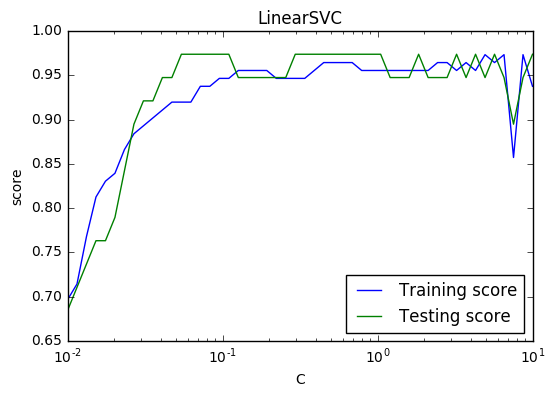

In [21]:
X_train, X_test, y_train, y_test=load_data_classification()
test_LinearSVC_C(X_train, X_test, y_train, y_test)

In [4]:
#非线性分类SVM

In [5]:
def test_SVC_linear(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.SVC(kernel='linear')
    cls.fit(X_train,y_train)
    print('Coefficients: %s, intercept %s' %(cls.coef_, cls.intercept_))
    print('Score: %.2f' % cls.score(X_test, y_test))

In [6]:
X_train, X_test, y_train, y_test=load_data_classification()
test_SVC_linear(X_train, X_test, y_train, y_test)
#可以看到线性核要比线性分类支持向量机LinearSVC的预测效果更佳，对测试集的预测全部正确

Coefficients: [[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept [ 2.0368826  1.1512924  6.3276538]
Score: 1.00


In [4]:
# 考察多项式核

In [7]:
def test_SVC_poly(*data):
    X_train, X_test, y_train, y_test=data
    fig=plt.figure()
    
    ###test degree###
    degrees=range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        cls=svm.SVC(kernel='poly', degree=degree)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1)
    ax.plot(degrees, train_scores, label="Training score", marker='+')
    ax.plot(degrees, test_scores, label="Testing score", marker='o')
    ax.set_title("SVC_poly_degree")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best", framealpha=0.5)
    
    ###test gamma###
    gammas=range(1, 20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='poly', gamma=gamma, degree=3)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas, train_scores, label="Training score", marker='+')
    ax.plot(gammas, test_scores, label="Testing score", marker='o')
    ax.set_title("SVC_poly_gamma")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc="best", framealpha=0.5)
    
    ###test r###
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='poly', gamma=10, degree=3, coef0=r)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs, train_scores, label="Training score", marker='+')
    ax.plot(rs, test_scores, label="Testing score", marker='o')
    ax.set_title("SVC_poly_r")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc="best", framealpha=0.5)
    plt.show()

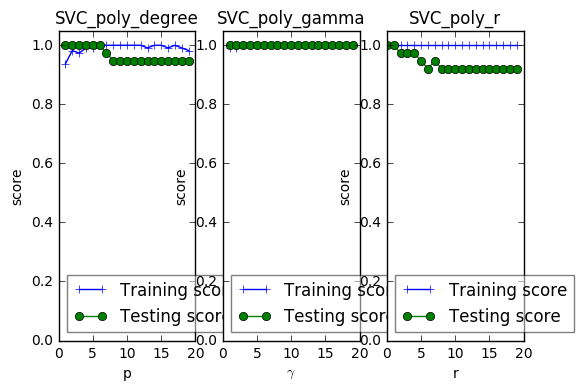

In [8]:
X_train, X_test, y_train, y_test=load_data_classification()
test_SVC_poly(X_train, X_test, y_train, y_test)
# 在测试集上的预测性能随p的变化比较平稳，随gamma影响不大，r=0时性能最佳

In [9]:
# 接下来考察高斯核
def test_SVC_rbf(*data):
    X_train, X_test, y_train, y_test = data
    gammas = range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='rbf', gamma=gamma)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas, train_scores, label="Training score", marker='+')
    ax.plot(gammas, test_scores, label="Testing score", marker='o')
    ax.set_title("SVC_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc="best", framealpha=0.5)
    plt.show()

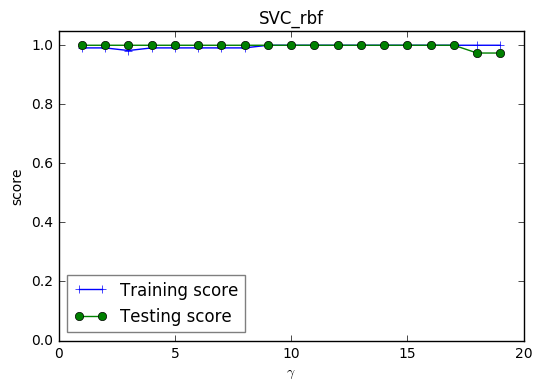

In [10]:
X_train, X_test, y_train, y_test=load_data_classification()
test_SVC_rbf(X_train, X_test, y_train, y_test)

In [1]:
#最后考察sigmoid核
def test_SVC_sigmod(*data):
    X_train, X_test, y_train, y_test=data
    fig=plt.figure()
    
    ###test gamma###
    gammas=np.logspace(-2, 1)
    train_scores=[]
    test_scores=[]
    
    for gamma in gammas:
        cls=svm.SVC(kernel='sigmoid', gamma=gamma, coef0=0)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas, train_scores, label="Training score", marker='+')
    ax.plot(gammas, test_scores, label="Testing score", marker='o')
    ax.set_title("SVC_sigmoid_gamma")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc="best", framealpha=0.5)
    ###测试 r###
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='sigmoid', coef0=r, gamma=0.01)
        cls.fit(X_train, y_train)
        train_scores.append(cls.score(X_train, y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs, train_scores, label="Training score", marker='+')
    ax.plot(rs, test_scores, label="Testing score", marker='o')
    ax.set_title("SVC_sigmoid_r")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0, 1.05)
    ax.legend(loc="best", framealpha=0.5)
    plt.show()

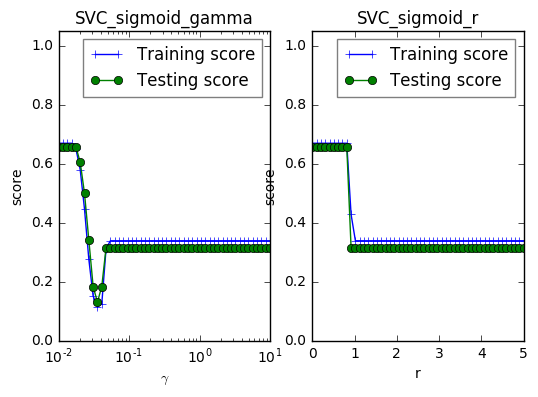

In [5]:
X_train, X_test, y_train, y_test=load_data_classification()
test_SVC_sigmod(X_train, X_test, y_train, y_test)

In [6]:
###################
####线性回归SVR####
###################

In [7]:
def test_LinearSVR(*data):
    X_train, X_test, y_train, y_test = data
    regr=svm.LinearSVR()
    regr.fit(X_train, y_train)
    print('Coefficients: %s, intercept %s' %(regr.coef_, regr.intercept_))
    print('Score: %.2f' % regr.score(X_test, y_test))

In [8]:
X_train, X_test, y_train, y_test = load_data_regression()
test_LinearSVR(X_train, X_test, y_train, y_test)

Coefficients: [ 2.14940259  0.4418875   6.35258779  4.62357282  2.82085901  2.42005063
 -5.3367464   5.41765142  7.26812843  4.33778867], intercept [ 99.]
Score: -0.56


In [ ]:
#p 183

# 第8章 人工神经网络

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris

In [2]:
x_12=np.random.randint(0,100,(4,1,))
x_12

array([[17],
       [ 6],
       [17],
       [16]])

In [3]:
x1=[[1],[2],[3]]
x2=[[2],[3],[4]]
np.hstack([x1,x2])

array([[1, 2],
       [2, 3],
       [3, 4]])

In [2]:
# 给出生成线性可分数据集的生成算法
def creat_data(n):
    np.random.seed(1)
    x_11=np.random.randint(0,100,(n,1))
    x_12=np.random.randint(0,100,(n,1,))
    x_13=20+np.random.randint(0,10,(n,1,))
    x_21=np.random.randint(0,100,(n,1))
    x_22=np.random.randint(0,100,(n,1))
    x_23=10-np.random.randint(0,10,(n,1,))
    
    new_x_12=x_12*np.sqrt(2)/2-x_13*np.sqrt(2)/2  # 沿x轴旋转45°
    new_x_13=x_12*np.sqrt(2)/2+x_13*np.sqrt(2)/2  # 沿x轴旋转45°
    new_x_22=x_22*np.sqrt(2)/2-x_23*np.sqrt(2)/2  # 沿x轴旋转45°
    new_x_23=x_22*np.sqrt(2)/2+x_23*np.sqrt(2)/2  # 沿x轴旋转45°
    
    plus_samples=np.hstack([x_11, new_x_12, new_x_13, np.ones((n,1))])
    minus_samples=np.hstack([x_21, new_x_22,new_x_23, -np.ones((n,1))])
    samples=np.vstack([plus_samples, minus_samples])
    np.random.shuffle(samples) # 混洗数据
    return samples

In [3]:
# 绘制数据集的函数
def plot_samples(ax, samples):
    Y=samples[:,-1] # 所有行，最后一列
    position_p=Y==1 ##正类位置
    position_m=Y==-1 ##负数位置
    ax.scatter(samples[position_p, 0], samples[position_p, 1],
              samples[position_p, 2], marker='+', label='+', color='b')
    ax.scatter(samples[position_m, 0], samples[position_m, 1],
              samples[position_m, 2], marker='^', label='-', color='y')

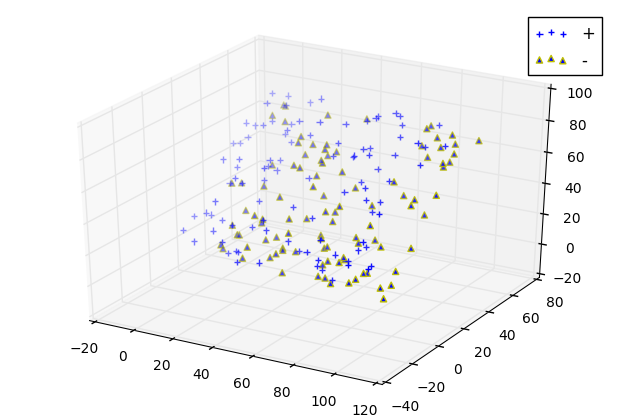

In [4]:
# plot_sample函数的用法
fig=plt.figure()
ax=Axes3D(fig)
data=creat_data(100)
plot_samples(ax, data)
ax.legend(loc='best')
plt.show()

In [7]:
# 然后给出感知机学习算法的原始形式算法的函数
def perceptron(train_data, eta, w_0, b_0):
    x=train_data[:,:-1] # x数据
    y=train_data[:,-1] # 对应的分类
    length=train_data.shape[0] # 样本集大小
    w=w_0
    b=b_0
    step_num=0
    while True:
        i=0
        while i<length: # 遍历一轮样本集中所有的样本点
            step_num += 1
            x_i=x[i].reshape((x.shape[1],1)) #转变成三行一列
            y_i=y[i]
            if y_i*(np.dot(np.transpose(w), x_i)+b) <=0: # 该点是误分类点 np.transpose()转置
                w=w+eta*y_i*x_i    # 梯度下降
                b=b+eta*y_i        # 梯度下降
                break
            else:
                i=i+1
        if(i==length):
            break
    return (w,b,step_num)

In [8]:
# 由于需要绘制分离超平面
def creat_hyperplane(x,y,w,b):
    return (-w[0][0]*x-w[1][0]*y-b)/w[2][0]

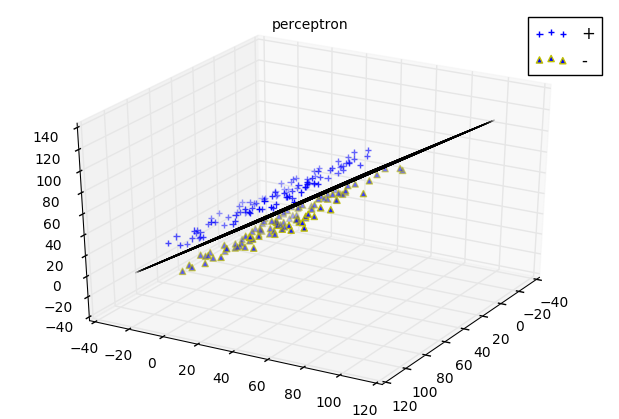

In [9]:
data=creat_data(100)
eta, w_0, b_0=0.1, np.ones((3,1), dtype=float), 1
w,b,num=perceptron(data, eta, w_0, b_0)

fig=plt.figure()
plt.suptitle("perceptron")
ax=Axes3D(fig)

### 绘制样本点
plot_samples(ax, data)

### 绘制分离超平面
x=np.linspace(-30, 100, 100)
y=np.linspace(-30, 100, 100)
x, y=np.meshgrid(x,y)
z=creat_hyperplane(x,y,w,b)
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='g', alpha=0.2)

ax.legend(loc="best")
ax.view_init(30, 30)  # 调整角度
plt.show()

In [10]:
# 感知机学习算法的对偶形式

In [11]:
#给出感知机学习算法的对偶形式算法的函数
def creat_w(train_data, alpha):
    x=train_data[:,:-1] # x数据
    y=train_data[:,-1] # 对应的分类
    N=train_data.shape[0] # 样本集大小
    w=np.zeros((x.shape[1],1))
    for i in range(0, N):
        w=w+alpha[i][0]*y[i]*(x[i].reshape(x[i].size, 1))
    return w

In [12]:
def perceptron_dual(train_data, eta, alpha_0, b_0):
    x=train_data[:,:-1]
    y=train_data[:,-1]
    length=train_data.shape[0]
    alpha=alpha_0
    b=b_0
    step_num=0
    while True:
        i=0
        while(i<length):
            step_num+=1
            x_i=x[i].reshape((x.shape[1],1))
            y_i=y[i]
            w=creat_w(train_data, alpha)
            z=y_i*(np.dot(np.transpose(w), x_i)+b)
            if z <=0:    # 该点是误分类点
                alpha[i][0]+=eta   # 梯度下降
                b+=eta*y_i   # 梯度下降
                break # 梯度下降了，从头开始，执行下一轮筛选
            else:
                i=i+1
        if(i==length):
            break
    return (alpha, b, step_num)

In [13]:
data=creat_data(100)
eta,w_0,b_0=0.1,np.ones((3,1),dtype=float),1
w_1,b_1,num_1=perceptron(data,eta,w_0,b_0)
#alpha,b_2,num_2=perceptron_dual(data, eta=0.1, alpha_0=np.zeros((data.shape[0]*2,1)), b_0=0)
#w_2=creat_w(data, alpha)

In [14]:
alpha,b_2,num_2=perceptron_dual(data, eta=0.1, alpha_0=np.zeros((data.shape[0]*2,1)), b_0=0)

In [15]:
w_2=creat_w(data, alpha)

In [16]:
print("w_1, b_1",w_1, b_1)
print("w_2, b_2", w_2, b_2)

('w_1, b_1', array([[-10.1       ],
       [-68.08433252],
       [ 64.85174234]]), -651.40000000007956)
('w_2, b_2', array([[-10.1       ],
       [-67.17514421],
       [ 64.06387437]]), -641.9000000000774)


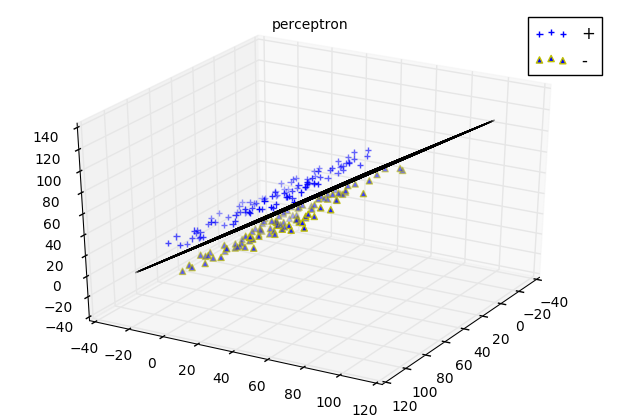

In [19]:
fig=plt.figure()
plt.suptitle("perceptron")
ax=Axes3D(fig)

## 绘制样本点
plot_samples(ax,data)

## 绘制分离超平面
x=np.linspace(-30, 100, 100) # 分离超平面的 x坐标数组
y=np.linspace(-30, 100, 100) # 分离超平面的 y坐标数组
x,y=np.meshgrid(x, y) # 划分网络
z=creat_hyperplane(x,y,w_1,b_1) # 原始形式算法的分离超平面的 z坐标数组
z_2=creat_hyperplane(x,y,w_2,b_2) # 对偶形式算法的分离超平面的 z坐标数组
ax.plot_surface(x, y, z, rstride=1, cstride=1, color='g', alpha=0.2)
ax.plot_surface(x, y, z_2, rstride=1, cstride=1, color='c', alpha=0.2)
ax.legend(loc="best")
ax.view_init(30, 30)  # 调整角度
plt.show()

In [20]:
# 神经网络

In [5]:
# 多层神经网络与线性不可分数据集
def creat_data_no_linear_2d(n):
    np.random.seed(1)
    x_11=np.random.randint(0, 100, (n,1))
    x_12=10+np.random.randint(-5, 5, (n,1,))
    x_21=np.random.randint(0, 100, (n,1))
    x_22=20+np.random.randint(0, 10, (n,1))
    x_31=np.random.randint(0, 100, (int(n/10),1))
    x_32=20+np.random.randint(0, 10, (int(n/10),1))
    
    new_x_11=x_11*np.sqrt(2)/2-x_12*np.sqrt(2)/2
    new_x_12=x_11*np.sqrt(2)/2+x_12*np.sqrt(2)/2
    new_x_21=x_21*np.sqrt(2)/2-x_22*np.sqrt(2)/2
    new_x_22=x_21*np.sqrt(2)/2+x_22*np.sqrt(2)/2
    new_x_31=x_31*np.sqrt(2)/2-x_32*np.sqrt(2)/2
    new_x_32=x_31*np.sqrt(2)/2+x_32*np.sqrt(2)/2
    plus_samples=np.hstack([new_x_11, new_x_12, np.ones((n,1))])
    minus_samples=np.hstack([new_x_21, new_x_22, -np.ones((n,1))])
    err_samples=np.hstack([new_x_31, new_x_32, np.ones((int(n/10),1))])
    samples=np.vstack([plus_samples, minus_samples, err_samples])
    np.random.shuffle(samples)
    return samples

In [6]:
# 然后给出绘制线性不可分数据集
def plot_samples_2d(ax, samples):
    Y=samples[:,-1]
    position_p=Y==1  # 正类位置
    position_m=Y==-1  # 负类位置
    ax.scatter(samples[position_p, 0], samples[position_p, 1], marker='+', label='+', color='b')
    ax.scatter(samples[position_m, 0], samples[position_m, 1], marker='^', label='-', color='y')

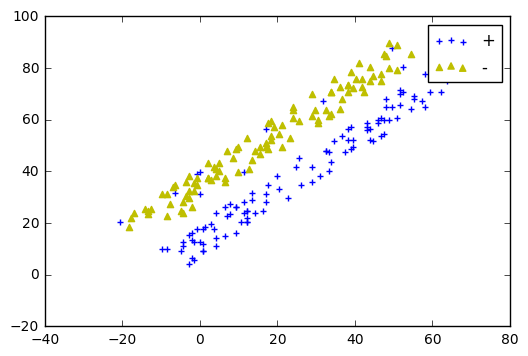

In [7]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
data=creat_data_no_linear_2d(100)
plot_samples_2d(ax, data)
ax.legend(loc='best')
plt.show()

In [8]:
# 用多层神经网络MLPClassifier来处理非线性数据集

In [20]:
def predict_with_MLPClassifier(ax, train_data):
    train_x=train_data[:,:-1]
    train_y=train_data[:,-1]
    clf=MLPClassifier(activation='logistic', max_iter=1000) # 构造分类器实例
    clf.fit(train_x, train_y)  # 训练分类器
    print(clf.score(train_x, train_y))  # 查看在训练集上的评价预测精度
    
    ## 用训练好的训练集预测平面上每一点的输出
    x_min, x_max = train_x[:,0].min()-1, train_x[:,0].max()+2
    y_min, y_max = train_x[:,1].min()-1, train_x[:,1].max()+2
    plot_step=1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)) # 生成格点
    Z=clf.predict(np.c_[xx.ravel(), yy.ravel()]) # 生成一个n*2的数组
    Z=Z.reshape(xx.shape) # 形成格点的排列形式
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

0.952380952381


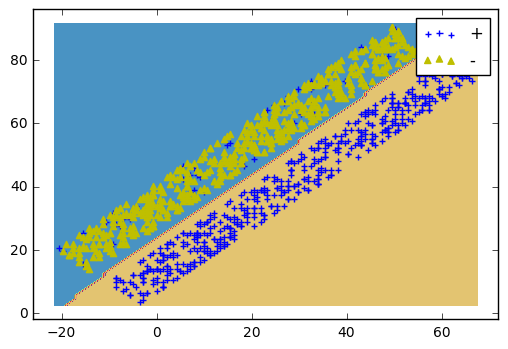

In [21]:
data=creat_data_no_linear_2d(500)
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
predict_with_MLPClassifier(ax, data)
plot_samples_2d(ax, data)
ax.legend(loc='best')
plt.show()

In [18]:
xx=np.array([[1,2],[2,2],[3,2]])
xx

array([[1, 2],
       [2, 2],
       [3, 2]])

In [19]:
xx.ravel() # 将nXm的矩阵变成一列

array([1, 2, 2, 2, 3, 2])

In [15]:
np.c_[np.array([1,2,3]), np.array([4,5,6])] # 合并两个一列数组

array([[1, 4],
       [2, 5],
       [3, 6]])

In [22]:
# 多层神经网络的应用
# 最后来看一个真实的例子：对鸢尾花进行分类

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [6]:
np.random.seed(0)
iris=datasets.load_iris()
X=iris.data[:,0:2] # sepal length and sepal width
Y=iris.target
data=np.hstack((X, Y.reshape(Y.size, 1)))
np.random.shuffle(data)
X=data[:,:-1]
Y=data[:,-1]
train_x=X[:-30]
test_x=X[-30:]
train_y=Y[:-30]
test_y=Y[-30:]

In [7]:
# 给出测试函数
def mlpclassifier_iris():
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    classifier=MLPClassifier(activation='logistic', max_iter=10000, hidden_layer_sizes=(30,))
    classifier.fit(train_x, train_y)
    train_score=classifier.score(train_x, train_y)
    test_score=classifier.score(test_x, test_y)
    x_min, x_max=train_x[:,0].min()-1, train_x[:, 0].max()+2
    y_min, y_max=train_x[:,1].min()-1, train_x[:, 1].max()+2
    plot_classifier_predict_meshgrid(ax, classifier, x_min, x_max, y_min, y_max)
    plot_samples(ax, train_x, train_y)
    ax.legend(loc='best')
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title("train score:%f;test score:%f" % (train_score, test_score))
    plt.show()
    
def plot_samples(ax, x, y):
    n_classes=3
    plot_colors="bry"
    for i,color in zip(range(n_classes), plot_colors):
        idx=np.where(y==i)
        ax.scatter(x[idx,0],x[idx,1],c=color,label=iris.target_names[i], cmap=plt.cm.Paired)

def plot_classifier_predict_meshgrid(ax, clf, x_min, x_max, y_min, y_max):
    plot_step=0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z=Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

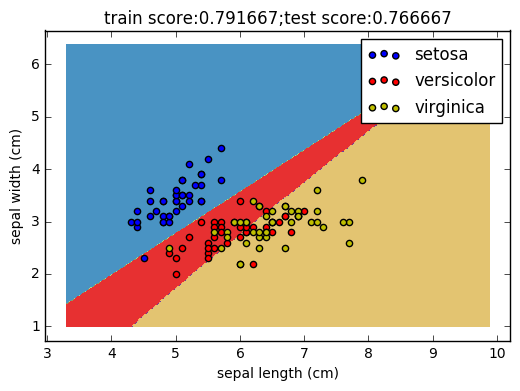

In [45]:
mlpclassifier_iris()

In [47]:
# 下面观察不同的隐含层对于多层神经网络分类器的影响
def mlpclassifier_iris_hidden_layer_sizes():
    fig=plt.figure()
    hidden_layer_sizes=[(10,),(30,),(100,),(5,5),(10,10),(30,30)]
    for itx, size in enumerate(hidden_layer_sizes):
        ax=fig.add_subplot(2,3,itx+1)
        classifier=MLPClassifier(activation='logistic', max_iter=10000, hidden_layer_sizes=size)
        classifier.fit(train_x, train_y)
        train_score=classifier.score(train_x,train_y)
        test_score=classifier.score(test_x, test_y)
        x_min, x_max=train_x[:,0].min()-1, train_x[:, 0].max()+2
        y_min, y_max=train_x[:,1].min()-1, train_x[:, 1].max()+2
        plot_classifier_predict_meshgrid(ax, classifier, x_min, x_max, y_min, y_max)
        plot_samples(ax, train_x, train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("layer_size:%s; train score:%f; test score:%f" % (size, train_score, test_score))
    plt.show()

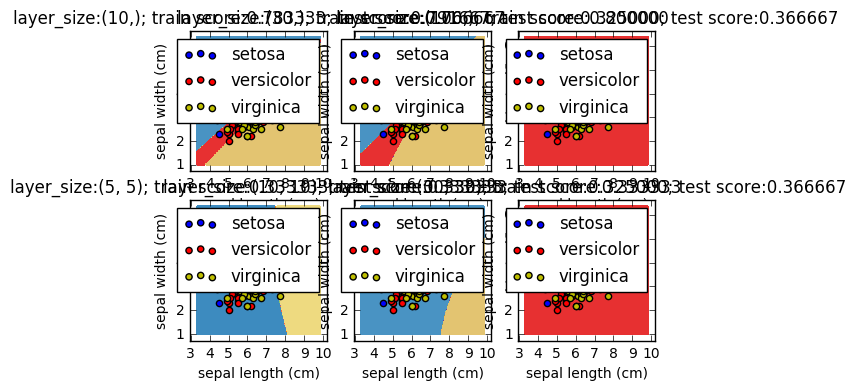

In [48]:
mlpclassifier_iris_hidden_layer_sizes()

In [13]:
# 下面观察激活函数对于多层神经网络分类器的影响
def mlpclassifier_iris_ativations():
    fig=plt.figure()
    ativations=["logistic","tanh","relu"]
    for itx, act in enumerate(ativations):
        ax=fig.add_subplot(1,3,itx+1)
        classifier=MLPClassifier(activation=act, max_iter=1000,hidden_layer_sizes=(30,))
        classifier.fit(train_x, train_y)
        train_score=classifier.score(train_x, train_y)
        test_score=classifier.score(test_x, test_y)
        x_min, x_max=train_x[:,0].min()-1, train_x[:, 0].max()+2
        y_min, y_max=train_x[:,1].min()-1, train_x[:, 1].max()+2
        plot_classifier_predict_meshgrid(ax,classifier, x_min, x_max, y_min, y_max)
        plot_samples(ax, train_x, train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("activation: %s; train score: %f; test score: %f" % (act, train_score, test_score))
    plt.show()

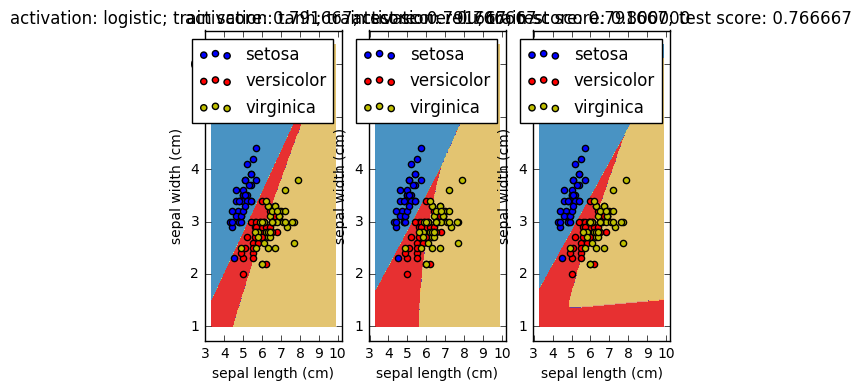

In [14]:
mlpclassifier_iris_ativations()

In [19]:
# 下面观察算法对于多层神经网络分类器的影响
def mlpclaassifier_iris_algorithms():
    fig=plt.figure()
    algorithms=["lbfgs", "sgd","adam"]
    for itx,algo in enumerate(algorithms):
        ax=fig.add_subplot(1,3,itx+1)
        classifier=MLPClassifier(activation="tanh",max_iter=10000,hidden_layer_sizes=(30,),solver=algo)
        classifier.fit(train_x, train_y)
        train_score=classifier.score(train_x, train_y)
        test_score=classifier.score(test_x, test_y)
        x_min, x_max = train_x[:, 0].min()-1, train_x[:,0].max()+2
        y_min, y_max = train_x[:, 1].min()-1, train_x[:,1].max()+2
        plot_classifier_predict_meshgrid(ax, classifier, x_min, x_max, y_min, y_max)
        plot_samples(ax, train_x, train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("algorithm:%s; train score:%f; test score:%f" % (algo, train_score, test_score))
    plt.show()

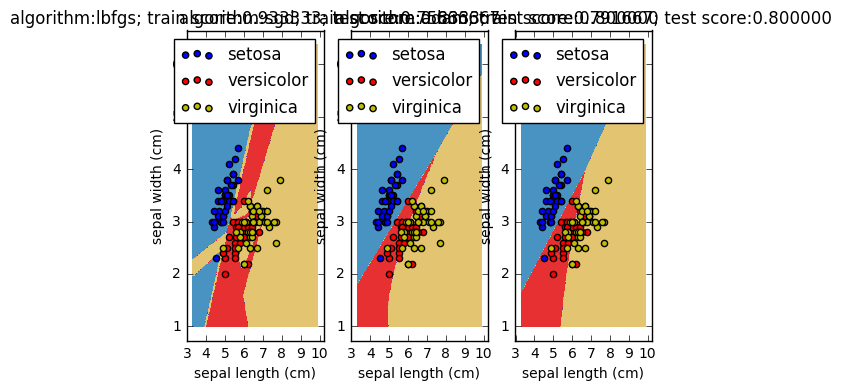

In [21]:
mlpclaassifier_iris_algorithms()

In [25]:
# 观察学习miu对多层神经网络分类器的影响
def mlpclassifier_iris_eta():
    fig=plt.figure()
    etas=[0.1,0.01,0.001,0.0001]
    for itx, eta in enumerate(etas):
        ax=fig.add_subplot(2,2,itx+1)
        classifier=MLPClassifier(activation="tanh", max_iter=1000000,hidden_layer_sizes=(30,),solver='sgd', learning_rate_init=eta)
        classifier.fit(train_x, train_y)
        iter_num = classifier.n_iter_
        train_score=classifier.score(train_x, train_y)
        test_score=classifier.score(test_x, test_y)
        x_min, x_max=train_x[:,0].min()-1, train_x[:, 0].max()+2
        y_min, y_max = train_x[:, 1].min()-1, train_x[:,1].max()+2
        plot_classifier_predict_meshgrid(ax, classifier, x_min, x_max, y_min,y_max)
        plot_samples(ax,train_x, train_y)
        ax.legend(loc='best')
        ax.set_xlabel(iris.feature_names[0])
        ax.set_ylabel(iris.feature_names[1])
        ax.set_title("eta: %f; train score: %f; test score:%f; iter_num: %d" % (eta, train_score, test_score, iter_num))
    plt.show()

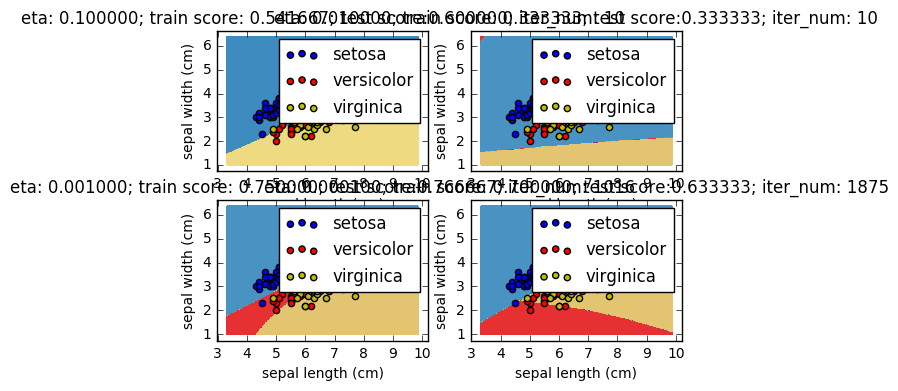

In [27]:
mlpclassifier_iris_eta()

# 第9章 半监督学习

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

In [2]:
# 然后给出加载数据集的函数load_data
def load_data():
    '''
    加载数据集
    
    ：return：一个元组，依次为：样本集合，样本标记集合，未标记样本的下标集合
    '''
    digits = datasets.load_digits()
    #####混洗样本#####
    rng=np.random.RandomState(0) #相同随机数
    indices=np.arange(len(digits.data)) #样本下标集合
    rng.shuffle(indices) # 混洗样本下标集合
    X = digits.data[indices]
    y = digits.target[indices]
    #####生成未标记样本的下标集合#####
    n_labeled_points = int(len(y)/10)  # 只有10%的样本有标记
    unlabeled_indices=np.arange(len(y))[n_labeled_points:] # 后面90%的样本未标记
    return X,y,unlabeled_indices

In [5]:
digits=datasets.load_digits()
len(digits.data)

1797

In [7]:
def test_LabelPropagation(*data):
    X,y,unlabeled_indices=data
    y_train=np.copy(y) # numpy 有广播
    y_train[unlabeled_indices]=-1 # 未标记样本的标记设定为-1
    clf=LabelPropagation(max_iter=100, kernel='rbf', gamma=0.1)
    clf.fit(X, y_train)
    ### 获取预测准确率
    true_labels = y[unlabeled_indices] # 真实标记
    print("Accuracy : %f" % clf.score(X[unlabeled_indices], true_labels))

    
data=load_data()
test_LabelPropagation(*data)

Accuracy : 0.958591


In [12]:
# 考察折中系数alpha对于rdf核的LabelPropagation的性能预测
def test_LabelPropagation_rbf(*data):
    X,y,unlabeled_indices=data
    y_train=np.copy(y)
    y_train[unlabeled_indices]=-1
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    #alphas=np.linspace(0.01,1,num=10, endpoint=True)
    alphas=np.linspace(0.01,1,num=2, endpoint=True)
    gammas=np.logspace(-2,1,num=50)
    #colors=((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
    #       (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2)) # 颜色集合，不同的曲线用不同的颜色
    colors=((1,0,0),(0,1,0))
    for alpha, color in zip(alphas, colors):
        scores=[]
        for gamma in gammas:
            clf=LabelPropagation(max_iter=100, gamma=gamma, alpha=alpha, kernel='rbf')
            clf.fit(X, y_train)
            #print('score:{0}'.format(clf.score(X[unlabeled_indices],y[unlabeled_indices])))
            scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
        ax.plot(gammas, scores, label=r"$\alpha=%s$" % alpha, color=color)
    
    ## 设置图形
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_xscale("log")
    ax.legend(loc="best")
    ax.set_title("LabelPropagation rbf kernel")
    plt.show()


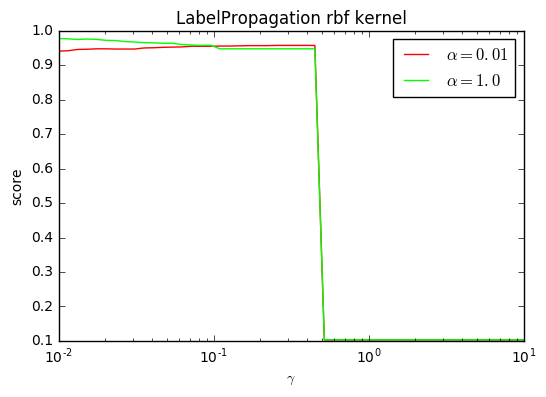

In [13]:
data=load_data()
test_LabelPropagation_rbf(*data)

In [8]:
alphas=np.linspace(0.01,1,num=2, endpoint=True)

In [9]:
alphas

array([ 0.01,  1.  ])

In [14]:
# 最后考察折中系数alpha以及n_neighbors参数对于knn核的LabelPropagation的预测性能的影响

In [15]:
def test_labelPropagation_knn(*data):
    '''
    测试LabelPropagation的knn核时，预测性随alpha和n_neighbors的变化
    '''
    X,y,unlabeled_indices=data
    y_train=np.copy(y)
    y_train[unlabeled_indices]=-1
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    alphas=np.linspace(0.01,1,num=3,endpoint=True)
    Ks=[1,2,3,4,5,8,10,15,20,25,30,35,40,50]
    colors=((1,0,0),(0,1,0),(0,0,1))
    for alpha,color in zip(alphas, colors):
        scores=[]
        for K in Ks:
            clf=LabelPropagation(max_iter=100, n_neighbors=K, alpha=alpha, kernel='knn')
            clf.fit(X,y_train)
            scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
        ax.plot(Ks, scores, label=r"$\alpha=%s$" % alpha, color=color)
        
    ### 设置图形
    ax.set_xlabel(r"$k$")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("LabelPropagation knn kernel")
    plt.show()

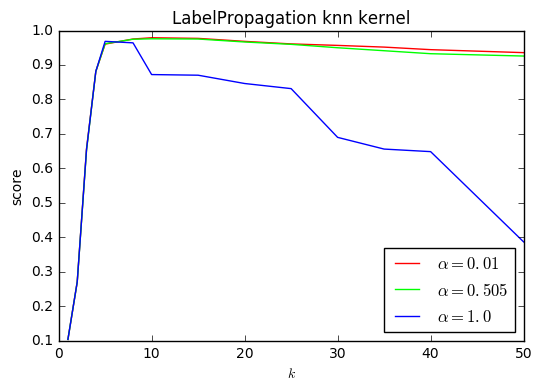

In [16]:
data=load_data()
test_labelPropagation_knn(*data)

In [9]:
def test_LabelSpreading(*data):
    '''
    测试Label Spreading的用法
    ：param data：一个元组，依次为：样本集合、样本标记集合，未标记样本的下标集合
    ：return：None
    '''
    
    X, y, unlabeled_indices=data
    y_train=np.copy(y)   # 必须复制，后面要用到y
    y_train[unlabeled_indices]=-1   # 未标记样本的标记设定为-1
    clf=LabelSpreading(max_iter=100, kernel='rbf', gamma=0.1)
    clf.fit(X, y_train)
    # 获取预测准确率1
    predicted_labels = clf.transduction_[unlabeled_indices]
    true_labels = y[unlabeled_indices]
    print("Accuracy:%f" % metrics.accuracy_score(true_labels, predicted_labels))

In [10]:
# 调用test_LabelSpreading函数
data=load_data()  # 获取半监督分类数据集
test_LabelSpreading(*data)  # 调用 test_LabelSpreading

Accuracy:0.972806


In [11]:
# 然后考察折中系数alpha以及gamma参数对于rbf核的LabelSpreading的预测性能的影响。给出测试函数
def test_LabelSpreading_rbf(*data):
    '''
    测试LabelSpreading的rbf核时，预测性能随alpha和gamma的变化
    
    ：param data：一个元组，依次为：样本集合、样本标记集合，未标记样本的下标集合
    ：return：None
    '''
    
    X,y,unlabeled_indices=data
    y_train=np.copy(y)
    y_train[unlabeled_indices]=-1
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    alphas=np.linspace(0.01,1,num=3, endpoint=True)
    gammas=np.logspace(-2,2,num=50)
    colors=((1,0,0),(0,1,0),(0,0,1))
    for alpha, color in zip(alphas, colors):
        scores=[]
        for gamma in gammas:
            clf=LabelSpreading(max_iter=100, gamma=gamma, alpha=alpha, kernel='rbf')
            clf.fit(X, y_train)
            scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
        ax.plot(gammas, scores, label=r"$\alpha=%s$" % alpha, color=color)
        
    ## 设置图形
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_xscale("log")
    ax.legend(loc="best")
    ax.set_title("LabelSpreading rbf kernel")
    plt.show()

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\semi_supervised\label_propagation.py:267: RuntimeWarning: invalid value encountered in divide
  self.label_distributions_ /= normalizer


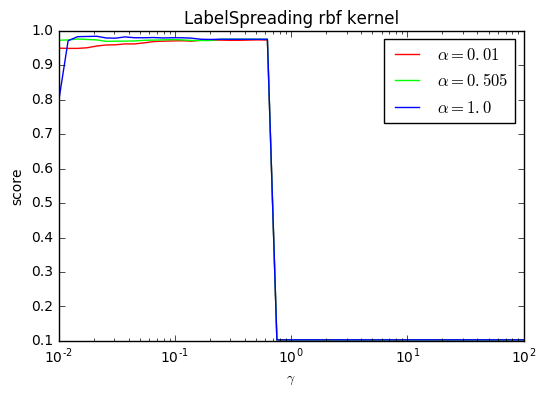

In [12]:
data=load_data()  # 获取半监督分类数据集
test_LabelSpreading_rbf(*data)  # 调用 test_LabelSpreading_rbf

In [13]:
# 最后考察折中系数啊alpha以及n_neighbors参数对于knn核的LabelSpreading的预测性能的影响
def test_LabelSpreading_knn(*data):
    '''
    测试LabelSpreading的rbf核时，预测性能随alpha和gamma的变化
    
    ：param data：一个元组，依次为：样本集合、样本标记集合，未标记样本的下标集合
    ：return：None
    '''
    
    X,y,unlabeled_indices=data
    y_train=np.copy(y)
    y_train[unlabeled_indices]=-1
    
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    alphas=np.linspace(0.01,1,num=3, endpoint=True)
    Ks=[1,2,3,4,5,8,10,15,20,25,30,35,40,50]
    colors=((1,0,0),(0,1,0),(0,0,1))
    for alpha, color in zip(alphas, colors):
        scores=[]
        for K in Ks:
            clf=LabelSpreading(max_iter=100, n_neighbors=K, alpha=alpha, kernel='knn')
            clf.fit(X, y_train)
            scores.append(clf.score(X[unlabeled_indices],y[unlabeled_indices]))
        ax.plot(gammas, scores, label=r"$\alpha=%s$" % alpha, color=color)
        
    ## 设置图形
    ax.set_xlabel(r"$K$")
    ax.set_ylabel("score")
    ax.set_xscale("log")
    ax.legend(loc="best")
    ax.set_title("LabelSpreading knn kernel")
    plt.show()

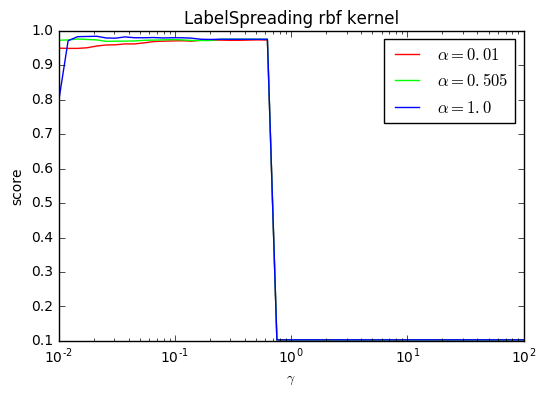

In [14]:
data=load_data()  # 获取半监督分类数据集
test_LabelSpreading_rbf(*data)  # 调用 test_LabelSpreading_knn

# 第十章 集成学习

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, cross_validation, ensemble

d:\python\lib\site-packages\scikit_learn-0.18.1-py2.7-win32.egg\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def load_data_regression():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target, test_size=0.25, random_state=0)

In [3]:
def load_data_classification():
    digits=datasets.load_digits()
    return cross_validation.train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [4]:
# 首先给出使用AdaBoostClassifier的函数

def test_AdaBoostClassifier(*data):
    X_train, X_test, y_train, y_test=data
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train, y_train)
    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(clf.estimators_)
    X=range(1,estimators_num+1)
    ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Training score")
    ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

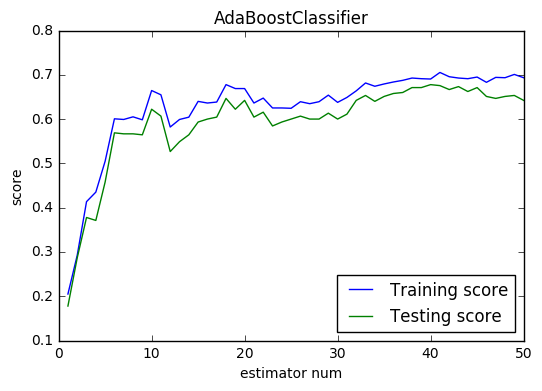

In [5]:
data=load_data_classification()
test_AdaBoostClassifier(*data)

In [14]:
# 下面考察不同类型的个体分类器的影响

from sklearn.naive_bayes import GaussianNB

def test_AdaBoostClassifier_base_classifier(*data):
    X_train, X_test, y_train, y_test = data
    fig=plt.figure()
    
    ### 默认的个体分类器
    ax=fig.add_subplot(2,1,1)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1)
    clf.fit(X_train, y_train)
    # 绘图
    estimators_num=len(clf.estimators_)
    X=range(1, estimators_num+1)
    ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Training score")
    ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Decision Tree")
    
    ### Gaussian Naive Bayes 个体分类器
    ax=fig.add_subplot(2,1,2)
    clf=ensemble.AdaBoostClassifier(learning_rate=0.1, base_estimator=GaussianNB())
    clf.fit(X_train, y_train)
    # 绘图
    estimators_num=len(clf.estimators_)
    X=range(1, estimators_num+1)
    ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="Training score")
    ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1)
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    plt.show()

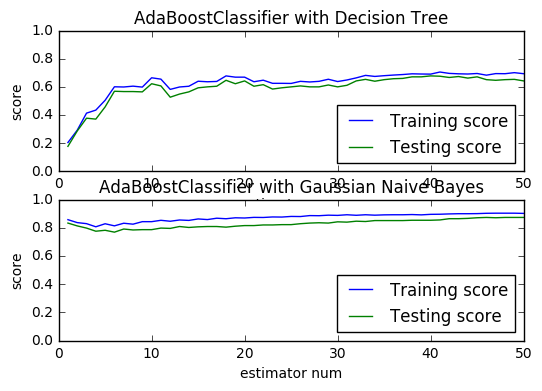

In [15]:
data=load_data_classification()
test_AdaBoostClassifier_base_classifier(*data)

In [4]:
# 下面考察学习率的影响，给出测试函数

In [9]:
def test_AdaBoostClassifier_learning_rate(*data):
    X_train, X_test, y_train, y_test = data
    learning_rates=np.linspace(0.01,1)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    training_scores=[]
    testing_scores=[]
    for learning_rate in learning_rates:
        clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500, algorithm='SAMME')
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(learning_rates, training_scores, label="Training score")
    ax.plot(learning_rates, testing_scores, label="Testing score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

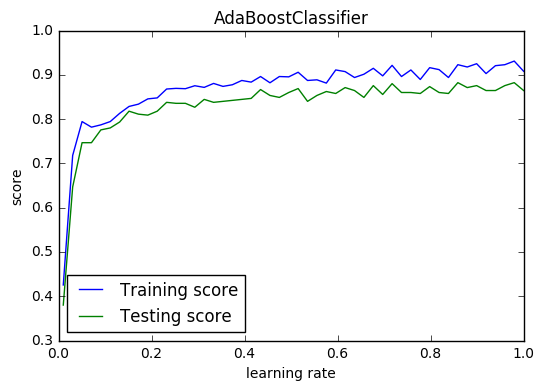

In [10]:
data=load_data_classification()
test_AdaBoostClassifier_learning_rate(*data)

In [48]:
# 最后考察algorithm的影响，给出测试函数
def test_AdaBoostClassifier_algorithm(*data):
    X_train, X_test, y_train, y_test=data
    algorithms=['SAMME.R','SAMME']
    fig=plt.figure(figsize=(10,8))
    learning_rates=[0.05, 0.1, 0.5, 0.9]
    for i, learning_rate in enumerate(learning_rates):
        ax=fig.add_subplot(2,2,i+1)
        for i, algorithm in enumerate(algorithms):
            clf=ensemble.AdaBoostClassifier(learning_rate=learning_rate, algorithm=algorithm)
            clf.fit(X_train, y_train)
            ## 绘图
            estimators_num=len(clf.estimators_)
            X=range(1, estimators_num+1)
            ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label="%s:Training score" % algorithms[i])
            ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label="%s: Testing score" % algorithms[i])
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right", frameon=False,fontsize=8)
        ax.set_title("learning rate:%f" % learning_rate)
    fig.suptitle("AdaBoostClassifier", fontsize=20)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.3)
    plt.show()

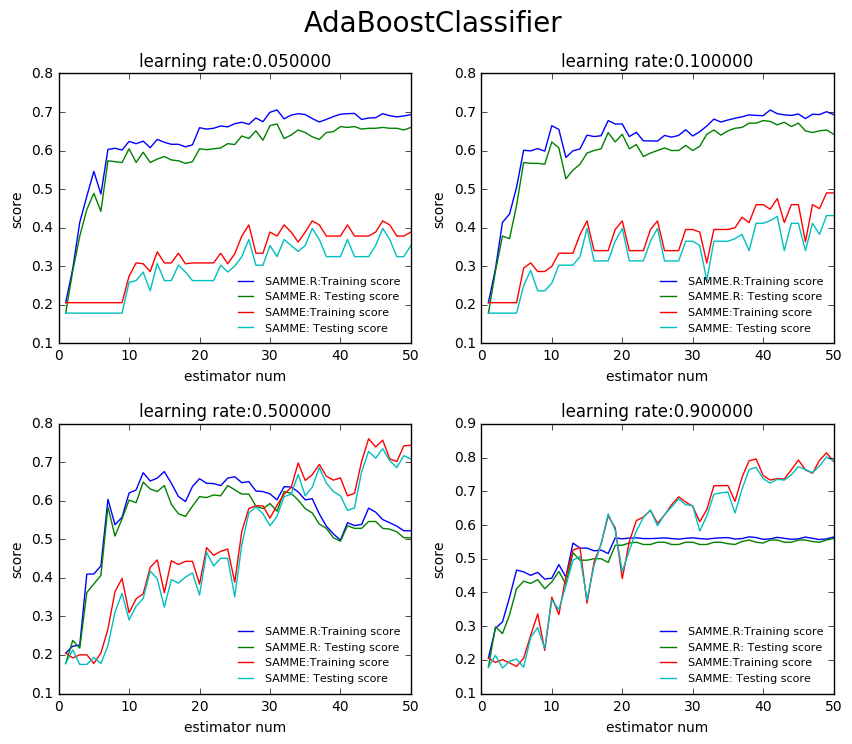

In [49]:
data=load_data_classification()
test_AdaBoostClassifier_algorithm(*data)

In [8]:
# AdaBoostRegressor回归器
def test_AdaBoostRegressor(*data):
    X_train, X_test, y_train, y_test=data
    regr=ensemble.AdaBoostRegressor()
    regr.fit(X_train, y_train)
    # 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    estimators_num=len(regr.estimators_)
    X=range(1, estimators_num+1)
    ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label="Training score")
    ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label="Testing score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="best")
    ax.set_title("AdaBoostRegressor")
    plt.show()

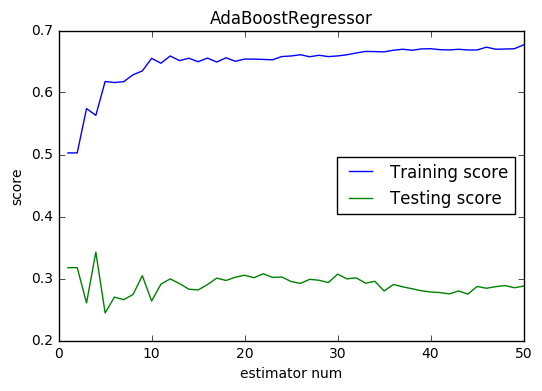

In [9]:
X_train, X_test, y_train, y_test = load_data_regression()
test_AdaBoostRegressor(X_train, X_test, y_train, y_test)

In [10]:
# 考察不同类型的个体分类器的影响，给出测试函数
from sklearn.svm import LinearSVR

def test_AdaBoostRegressor_base_regr(*data):
    X_train, X_test, y_train, y_test = data
    fig=plt.figure()
    regrs=[ensemble.AdaBoostRegressor(), ensemble.AdaBoostRegressor(base_estimator=LinearSVR(epsilon=0.01, C=100))]
    labels=["Decision Tree Regressor", "Linear SVM Regressor"]
    for i, regr in enumerate(regrs):
        ax=fig.add_subplot(2,1,i+1)
        regr.fit(X_train, y_train)
        # 绘图
        estimators_num=len(regr.estimators_)
        X=range(1, estimators_num+1)
        ax.plot(list(X), list(regr.staged_score(X_train, y_train)), label="Training score")
        ax.plot(list(X), list(regr.staged_score(X_test, y_test)), label="Testing score")
        ax.set_xlabel("estimator num")
        ax.set_ylabel("score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
        ax.set_title("Base_Estimator: %s"%labels[i])
    plt.suptitle("AdaBoostRegressor")
    plt.show()

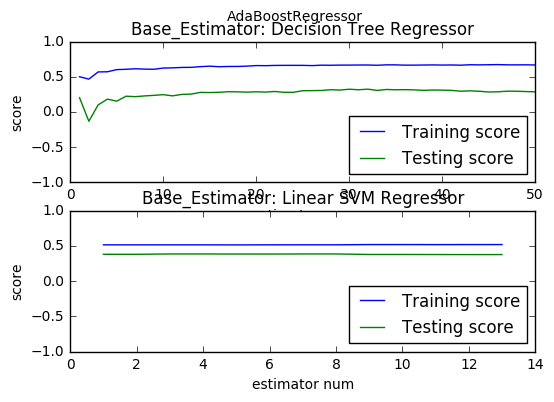

In [11]:
X_train, X_test, y_train, y_test = load_data_regression()
test_AdaBoostRegressor_base_regr(X_train, X_test, y_train, y_test)

In [16]:
# 考察损失函数的影响，给出测试函数：
def test_AdaBoostRegressor_loss(*data):
    X_train, X_test, y_train, y_test=data
    losses=['linear', 'square', 'exponential']
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    for i, loss in enumerate(losses):
        regr=ensemble.AdaBoostRegressor(loss=loss, n_estimators=30)
        regr.fit(X_train, y_train)
        ## 绘图
        estimators_num=len(regr.estimators_)
        X=range(1, estimators_num+1)
        ax.plot(list(X), list(regr.staged_score(X_train, y_train)),label="Training score:loss=%s" % loss)
        ax.set_xlabel("estimator num")
        ax.set_ylabel("Score")
        ax.legend(loc="lower right")
        ax.set_ylim(-1,1)
    plt.suptitle("AdaBoostRegressor")
    plt.show()

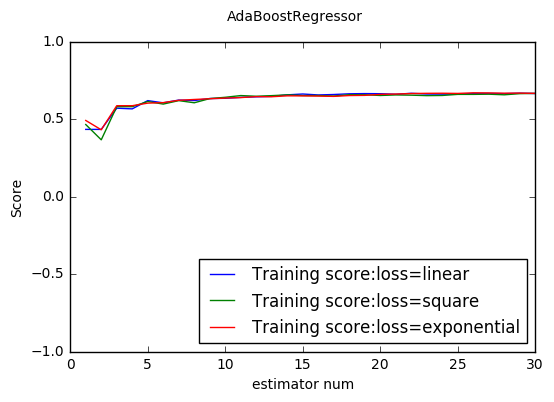

In [17]:
X_train, X_test, y_train, y_test = load_data_regression()
test_AdaBoostRegressor_loss(X_train, X_test, y_train, y_test)

In [4]:
# Gradient Tree Boosting
def test_GradientBoostingClassifier(*data):
    X_train, X_test, y_train, y_test = data
    clf=ensemble.GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    print("Training Score:%f" % clf.score(X_train, y_train))
    print("Testing Score:%f" % clf.score(X_test, y_test))

In [5]:
X_train, X_test, y_train, y_test = load_data_classification()
test_GradientBoostingClassifier(X_train, X_test, y_train, y_test)

Training Score:1.000000
Testing Score:0.962222


In [6]:
# 考察个体决策树的数量对于GBDT预测性能的影响，给出函数
def test_GradientBoostingClassifier_num(*data):
    X_train, X_test, y_train, y_test=data
    nums=np.arange(1,100,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        clf=ensemble.GradientBoostingClassifier(n_estimators=num)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(nums, training_scores, label="Testing Score")
    ax.plot(nums, testing_scores, label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

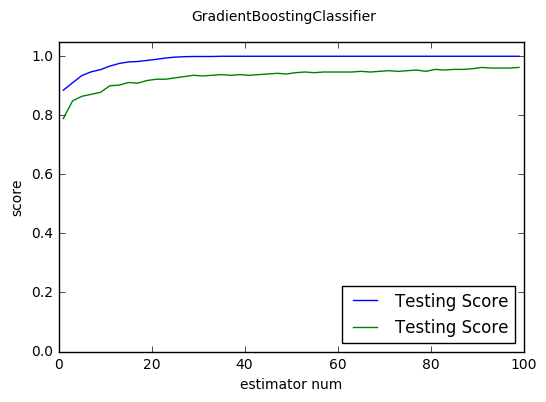

In [7]:
X_train, X_test, y_train, y_test = load_data_classification()
test_GradientBoostingClassifier_num(X_train, X_test, y_train, y_test)

In [10]:
# 考察个体决策树的最大树深对于GBDT预测性能的影响，给出函数

def test_GradientBoostingClassifier_maxdepth(*data):
    X_train, X_test, y_train, y_test = data
    maxdepths=np.arange(1, 20)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for maxdepth in maxdepths:
        clf=ensemble.GradientBoostingClassifier(max_depth=maxdepth, max_leaf_nodes=None)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(maxdepths, training_scores, label="Training Score")
    ax.plot(maxdepths, testing_scores, label="Testing Score")
    ax.set_xlabel("max_depth")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0, 1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

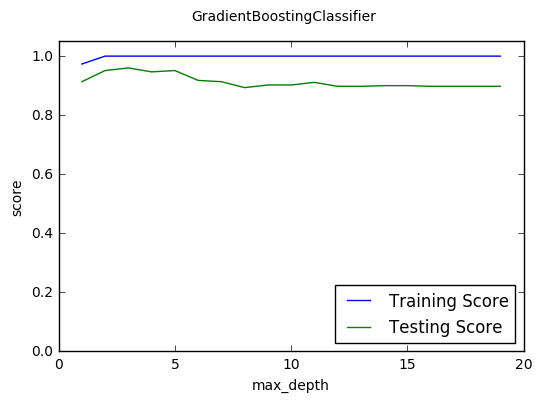

In [12]:
X_train, X_test, y_train, y_test = load_data_classification()
test_GradientBoostingClassifier_maxdepth(X_train, X_test, y_train, y_test)

In [7]:
# 接着考察学习率对于GBDT的预测性能的影响，给出函数
def test_GradientBoostingClassifier_learning(*data):
    X_train, x_test, y_train, y_test=data
    learnings=np.linspace(0.01, 1.0)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for learning in learnings:
        clf=ensemble.GradientBoostingClassifier(learning_rate=learning)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(learnings, training_scores, label="Training Score")
    ax.plot(learnings, testing_scores, label="Testing Score")
    ax.set_xlabel("learning_rate")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

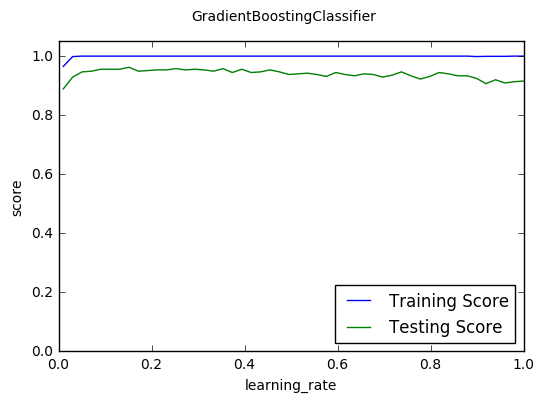

In [8]:
X_train, X_test, y_train, y_test = load_data_classification()
test_GradientBoostingClassifier_learning(X_train, X_test, y_train, y_test)

In [14]:
# 然后考察subsample的影响。当subsample ！= 1时，就是随机梯度提升树。给出测试函数：
def test_GradientBoostingClassifier_subsample(*data):
    X_train, X_test, y_train, y_test=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    subsamples=np.linspace(0.01,1.0)
    testing_scores=[]
    training_scores=[]
    for subsample in subsamples:
        clf=ensemble.GradientBoostingClassifier(subsample=subsample)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(subsamples, training_scores, label="Training Score")
    ax.plot(subsamples, testing_scores, label="Training Score")
    ax.set_xlabel("Subsample")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0, 1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

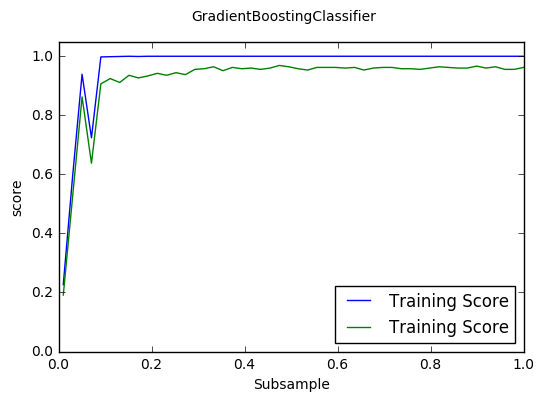

In [16]:
X_train, X_test, y_train, y_test = load_data_classification()
test_GradientBoostingClassifier_subsample(X_train, X_test, y_train, y_test)

In [17]:
# 最后考察max_features参数的影响。当max_features取浮点数时，它的值在（0,1]之间。如果max_features != 1.0, 则每次决策树的特征选取的集合是原来特征集合的
# 的一个子集

def test_GradientBoostingClassifier_max_features(*data):
    X_train, X_test, y_train, y_test = data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    max_features=np.linspace(0.01, 1.0)
    testing_scores=[]
    training_scores=[]
    for features in max_features:
        clf=ensemble.GradientBoostingClassifier(max_features=features)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train, y_train))
        testing_scores.append(clf.score(X_test, y_test))
    ax.plot(max_features, training_scores, label="Training Score")
    ax.plot(max_features, testing_scores, label="Training Score")
    ax.set_xlabel("max_features")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0, 1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

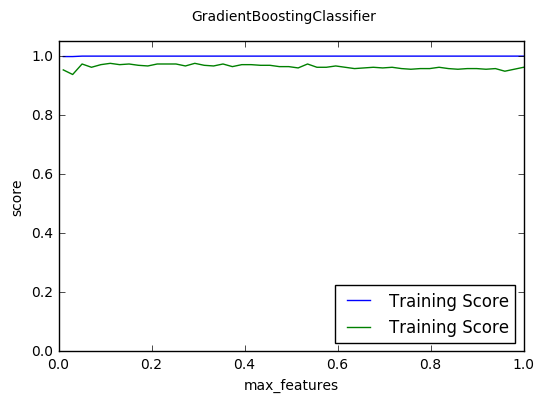

In [18]:
X_train, X_test, y_train, y_test = load_data_classification()
test_GradientBoostingClassifier_max_features(X_train, X_test, y_train, y_test)

In [19]:
# GradientBoostingRegressor
def test_GradientBoostingRegressor(*data):
    X_train, X_test, y_train, y_test=data
    regr=ensemble.GradientBoostingRegressor()
    regr.fit(X_train, y_train)
    print("Training score:%f" % regr.score(X_train, y_train))
    print("Testing score:%f" % regr.score(X_test, y_test))

In [20]:
X_train, X_test, y_train, y_test = load_data_regression()
test_GradientBoostingRegressor(X_train, X_test, y_train, y_test)

Training score:0.878471
Testing score:0.219043


In [23]:
# 考察个体回归数的数量对于GBRT预测性能的影响，给出函数：

def test_GradientBoostingRegressor_num(*data):
    X_train, X_test, y_train, y_test = data
    nums=np.arange(1,200,step=2)
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    testing_scores=[]
    training_scores=[]
    for num in nums:
        regr=ensemble.GradientBoostingRegressor(n_estimators=num)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train, y_train))
        testing_scores.append(regr.score(X_test, y_test))
    ax.plot(nums, training_scores, label="Trainging Score")
    ax.plot(nums, testing_scores, label="Testing Score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc="lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingRegressor")
    plt.show()

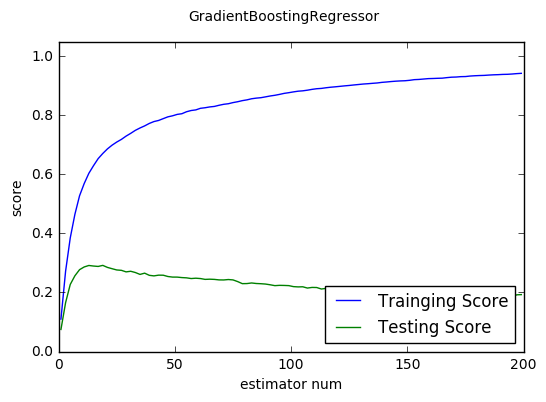

In [25]:
X_train, X_test, y_train, y_test = load_data_regression()
test_GradientBoostingRegressor_num(X_train, X_test, y_train, y_test)

In [ ]:
# p282 下面考察个体回归数的最大数深度

# 第十一章 数据预处理

### 二元化

In [1]:
from sklearn.preprocessing import Binarizer

In [2]:
X=[[1,2,3,4,5],[5,4,3,2,1],[3,3,3,3,3],[1,1,1,1,1]]
print("before transform:", X)
binarizer=Binarizer(threshold=2.5)
print("after transform:", binarizer.transform(X))

('before transform:', [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]])
('after transform:', array([[0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0]]))


### 独热码

In [1]:
from sklearn.preprocessing import OneHotEncoder

In [2]:
X=[[1,2,3,4,5],[5,4,3,2,1],[3,3,3,3,3],[1,1,1,1,1]]
print("before transform:", X)
encoder=OneHotEncoder(sparse=False)
encoder.fit(X)
print("active_features_:", encoder.active_features_)
print("feature_indices_:", encoder.feature_indices_)
print("n_values_:", encoder.n_values_)
print("after transform:", encoder.transform([[1,2,3,4,5]]))
# 详细解释看p320页

('before transform:', [[1, 2, 3, 4, 5], [5, 4, 3, 2, 1], [3, 3, 3, 3, 3], [1, 1, 1, 1, 1]])
('active_features_:', array([ 1,  3,  5,  7,  8,  9, 10, 12, 14, 16, 17, 18, 19, 21, 23, 25]))
('feature_indices_:', array([ 0,  6, 11, 15, 20, 26]))
('n_values_:', array([6, 5, 4, 5, 6]))
('after transform:', array([[ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.]]))


### 标准化
#### MinMaxScaler

In [5]:
from sklearn.preprocessing import MinMaxScaler
X=[[1,5,1,2,10],
   [2,6,3,2,7],
   [3,7,5,6,4],
   [4,8,7,8,1]]

print("before transform:", X)
scaler=MinMaxScaler(feature_range=(0,1)) # 指定预期变换之后属性的取值范围
scaler.fit(X)
print("min_is :", scaler.min_)
print("scale_is:", scaler.scale_)
print("data_max_ is :", scaler.data_max_)
print("data_min_is :", scaler.data_min_)
print("data_range_is :", scaler.data_range_)
print("after transform:", scaler.transform(X))

('before transform:', [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]])
('min_is :', array([-0.33333333, -1.66666667, -0.16666667, -0.33333333, -0.11111111]))
('scale_is:', array([ 0.33333333,  0.33333333,  0.16666667,  0.16666667,  0.11111111]))
('data_max_ is :', array([  4.,   8.,   7.,   8.,  10.]))
('data_min_is :', array([ 1.,  5.,  1.,  2.,  1.]))
('data_range_is :', array([ 3.,  3.,  6.,  6.,  9.]))
('after transform:', array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.33333333,  0.33333333,  0.33333333,  0.        ,  0.66666667],
       [ 0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.33333333],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  0.        ]]))


#### MaxAbsScaler

In [6]:
# 每个属性值除以该属性的绝对值中的最大值
from sklearn.preprocessing import MaxAbsScaler

X=[[1,5,1,2,10],
   [2,6,3,2,7],
   [3,7,5,6,4],
   [4,8,7,8,1]]

print("before transform:", X)
scaler=MaxAbsScaler()
scaler.fit(X)
print("scale_is:", scaler.scale_)
print("max_abs_is:", scaler.max_abs_)
print("after transform:", scaler.transform(X))

('before transform:', [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]])
('scale_is:', array([  4.,   8.,   7.,   8.,  10.]))
('max_abs_is:', array([  4.,   8.,   7.,   8.,  10.]))
('after transform:', array([[ 0.25      ,  0.625     ,  0.14285714,  0.25      ,  1.        ],
       [ 0.5       ,  0.75      ,  0.42857143,  0.25      ,  0.7       ],
       [ 0.75      ,  0.875     ,  0.71428571,  0.75      ,  0.4       ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  0.1       ]]))


#### StandardScaler

In [8]:
# 标准化后，样本集的所有属性的均值均为0，标准差均为1
from  sklearn.preprocessing import StandardScaler
X=[[1,5,1,2,10],
   [2,6,3,2,7],
   [3,7,5,6,4],
   [4,8,7,8,1]]

print("before transform:" ,X)
scaler=StandardScaler()
scaler.fit(X)
print("scale_is:", scaler.scale_)
print("mean_is:", scaler.mean_)
print("var_is:", scaler.var_)
print("after transform:", scaler.transform(X))

('before transform:', [[1, 5, 1, 2, 10], [2, 6, 3, 2, 7], [3, 7, 5, 6, 4], [4, 8, 7, 8, 1]])
('scale_is:', array([ 1.11803399,  1.11803399,  2.23606798,  2.59807621,  3.35410197]))
('mean_is:', array([ 2.5,  6.5,  4. ,  4.5,  5.5]))
('var_is:', array([  1.25,   1.25,   5.  ,   6.75,  11.25]))
('after transform:', array([[-1.34164079, -1.34164079, -1.34164079, -0.96225045,  1.34164079],
       [-0.4472136 , -0.4472136 , -0.4472136 , -0.96225045,  0.4472136 ],
       [ 0.4472136 ,  0.4472136 ,  0.4472136 ,  0.57735027, -0.4472136 ],
       [ 1.34164079,  1.34164079,  1.34164079,  1.34715063, -1.34164079]]))
